# Credit Risk Modelling (PD Model Estimation)

In [168]:
import numpy as np
import pandas as pd

In [169]:
df_bckup=pd.read_csv(r"C:\Users\satyaki basak\Downloads\loan_data_2007_2014 (1).csv")

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3275024087.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bckup=pd.read_csv(r"C:\Users\satyaki basak\Downloads\loan_data_2007_2014 (1).csv")


In [170]:
df=df_bckup.copy()

In [171]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [174]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [175]:
df['emp_length_int']=df['emp_length'].str.replace('+ years','')
df['emp_length_int']=df['emp_length_int'].str.replace('< 1 year',str(0))
df['emp_length_int']=df['emp_length_int'].str.replace('nan',str(0))
df['emp_length_int']=df['emp_length_int'].str.replace('years','')
df['emp_length_int']=df['emp_length_int'].str.replace('year','')

In [176]:
df['emp_length_int'].unique()

array(['10', '0', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [177]:
type(df['emp_length_int'][0])

str

In [178]:
df['emp_length_int']=pd.to_numeric(df['emp_length_int'])

In [179]:
type(df['emp_length_int'][0])

numpy.float64

In [180]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [181]:
df['term_int']=df['term'].str.replace('months','')

In [182]:
df['term_int']=pd.to_numeric(df['term_int'])

In [183]:
type(df['term_int'][0])

numpy.int64

we have preprocessed term and emp length to integer/float value

In [184]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [185]:
df['earliest_cr_line_date']=pd.to_datetime(df['earliest_cr_line'],format= '%b-%y')

In [186]:
df['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [187]:
type(df['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [188]:
pd.to_datetime('2017-12-01')-df['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [189]:
df['mnth_since_earliest_cr_line_date']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-df['earliest_cr_line_date'])/np.timedelta64(30,'D')))

In [190]:
df['mnth_since_earliest_cr_line_date'].describe()

count    466256.000000
mean        242.979220
std          95.344015
min        -621.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: mnth_since_earliest_cr_line_date, dtype: float64

In [191]:
df.loc[:,['earliest_cr_line','earliest_cr_line_date','mnth_since_earliest_cr_line_date']][df['mnth_since_earliest_cr_line_date']<0]

,earliest_cr_line,earliest_cr_line_date,mnth_since_earliest_cr_line_date
1580,Sep-62,2062-09-01,-545.0
1770,Sep-68,2068-09-01,-618.0
2799,Sep-64,2064-09-01,-569.0
3282,Sep-67,2067-09-01,-606.0
3359,Feb-65,2065-02-01,-574.0
...,...,...,...
464003,Jan-68,2068-01-01,-610.0
464260,Jul-66,2066-07-01,-591.0
465100,Oct-67,2067-10-01,-607.0
465500,Sep-67,2067-09-01,-606.0


In [192]:
df['mnth_since_earliest_cr_line_date'][df['mnth_since_earliest_cr_line_date']<0]=df['mnth_since_earliest_cr_line_date'].max()

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3150755564.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mnth_since_earliest_cr_line_date'][df['mnth_since_earliest_cr_line_date']<0]=df['mnth_since_earliest_cr_line_date'].

In [193]:
df['mnth_since_earliest_cr_line_date'].describe()

count    466256.000000
mean        245.925734
std          87.722725
min          74.000000
25%         187.000000
50%         229.000000
75%         289.000000
max         596.000000
Name: mnth_since_earliest_cr_line_date, dtype: float64

In [194]:
df['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [195]:
df['issue_date']=pd.to_datetime(df['issue_d'],format= '%b-%y')

In [196]:
df['mnth_since_issue_date']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-df['issue_date'])/np.timedelta64(30,'D')))

In [197]:
df['mnth_since_issue_date'].describe()

count    466285.000000
mean         52.265887
std          14.385250
min          37.000000
25%          42.000000
50%          48.000000
75%          58.000000
max         128.000000
Name: mnth_since_issue_date, dtype: float64

we have preprocessed time related variable like earliest cr line and issue date 

#### Preprocessing few discrete variable

In [198]:
pd.get_dummies(df['grade'],prefix='grade',prefix_sep=':').astype(int)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [199]:
df_dummies=[pd.get_dummies(df['grade'],prefix='grade',prefix_sep=':').astype(int),
            pd.get_dummies(df['sub_grade'],prefix='sub_grade',prefix_sep=':').astype(int),
            pd.get_dummies(df['home_ownership'],prefix='home_ownership',prefix_sep=':').astype(int),
            pd.get_dummies(df['verification_status'],prefix='verification_status',prefix_sep=':').astype(int),
            pd.get_dummies(df['loan_status'],prefix='loan_status',prefix_sep=':').astype(int),
            pd.get_dummies(df['purpose'],prefix='purpose',prefix_sep=':').astype(int),
            pd.get_dummies(df['addr_state'],prefix='addr_state',prefix_sep=':').astype(int),
            pd.get_dummies(df['initial_list_status'],prefix='initial_list_status',prefix_sep=':').astype(int)]
           

In [200]:
df_dummies=pd.concat(df_dummies,axis=1)

In [201]:
df=pd.concat([df,df_dummies],axis=1)

#### checking for missing values and clean

In [202]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [203]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'],inplace=True)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\949451292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_rev_hi_lim'].fillna(df['funded_amnt'],inplace=True)


In [204]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\1948923333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)


In [205]:
df['mnth_since_earliest_cr_line_date'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3370070322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mnth_since_earliest_cr_line_date'].fillna(0, inplace=True)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3370070322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

#### Data Preparation for PD model 

In [206]:
#Depedent variable
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [207]:
df['loan_status'].value_counts()/df['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [208]:
df['good_bad']=np.where(df['loan_status'].isin(['Charged Off ','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [209]:
df['good_bad']

0         1
1         1
2         1
3         1
4         1
         ..
466280    1
466281    1
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df.drop('good_bad', axis=1), df['good_bad'], test_size=0.2, random_state=42)

In [212]:
df_input_train.shape

(373028, 207)

In [213]:
df_input_test.shape

(93257, 207)

In [214]:
df_target_train.shape

(373028,)

In [215]:
df_target_test.shape

(93257,)

In [216]:
#df_input_prepr=df_input_train
#df_target_prepr=df_target_train
df_input_prepr=df_input_test
df_target_prepr=df_target_test

In [217]:
df_input_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [218]:
df1=pd.concat([df_input_prepr['grade'],df_target_prepr],axis=1)

In [219]:
df1

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1
...,...,...
115,B,1
296284,B,1
61777,A,1
91763,A,1


In [220]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [221]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [222]:
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
               df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [223]:
df1=df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,15108,0.995036
1,B,27199,0.988382
2,C,25048,0.980917
3,D,15390,0.971150
4,E,7145,0.964871
5,F,2699,0.959985
6,G,668,0.926647


In [224]:
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [225]:
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [226]:
df1.head()

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.995036,0.162004
1,B,27199,0.988382,0.291656
2,C,25048,0.980917,0.268591
3,D,15390,0.971150,0.165028
4,E,7145,0.964871,0.076616


In [227]:
df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']

In [228]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.995036,0.162004,15033.0,75.0
1,B,27199,0.988382,0.291656,26883.0,316.0
2,C,25048,0.980917,0.268591,24570.0,478.0
3,D,15390,0.971150,0.165028,14946.0,444.0
4,E,7145,0.964871,0.076616,6894.0,251.0
5,F,2699,0.959985,0.028942,2591.0,108.0
6,G,668,0.926647,0.007163,619.0,49.0


In [229]:
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()

In [230]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.995036,0.162004,15033.0,75.0,0.164230,0.043579
1,B,27199,0.988382,0.291656,26883.0,316.0,0.293688,0.183614
2,C,25048,0.980917,0.268591,24570.0,478.0,0.268419,0.277745
3,D,15390,0.971150,0.165028,14946.0,444.0,0.163280,0.257990
4,E,7145,0.964871,0.076616,6894.0,251.0,0.075315,0.145845
5,F,2699,0.959985,0.028942,2591.0,108.0,0.028306,0.062754
6,G,668,0.926647,0.007163,619.0,49.0,0.006762,0.028472


In [231]:
df1['woe']=np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [232]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe
0,A,15108,0.995036,0.162004,15033.0,75.0,0.164230,0.043579,1.326688
1,B,27199,0.988382,0.291656,26883.0,316.0,0.293688,0.183614,0.469680
2,C,25048,0.980917,0.268591,24570.0,478.0,0.268419,0.277745,-0.034156
3,D,15390,0.971150,0.165028,14946.0,444.0,0.163280,0.257990,-0.457452
4,E,7145,0.964871,0.076616,6894.0,251.0,0.075315,0.145845,-0.660873
5,F,2699,0.959985,0.028942,2591.0,108.0,0.028306,0.062754,-0.796159
6,G,668,0.926647,0.007163,619.0,49.0,0.006762,0.028472,-1.437542


In [233]:
df1=df1.sort_values(['woe'])
df1=df1.reset_index(drop=True)

In [234]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe
0,G,668,0.926647,0.007163,619.0,49.0,0.006762,0.028472,-1.437542
1,F,2699,0.959985,0.028942,2591.0,108.0,0.028306,0.062754,-0.796159
2,E,7145,0.964871,0.076616,6894.0,251.0,0.075315,0.145845,-0.660873
3,D,15390,0.971150,0.165028,14946.0,444.0,0.163280,0.257990,-0.457452
4,C,25048,0.980917,0.268591,24570.0,478.0,0.268419,0.277745,-0.034156
5,B,27199,0.988382,0.291656,26883.0,316.0,0.293688,0.183614,0.469680
6,A,15108,0.995036,0.162004,15033.0,75.0,0.164230,0.043579,1.326688


In [235]:
df1['diff_prop_good']=df1['prop_good'].diff().abs()
df1['diff_woe']=df1['woe'].diff().abs()
df1


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe
0,G,668,0.926647,0.007163,619.0,49.0,0.006762,0.028472,-1.437542,NaN,NaN
1,F,2699,0.959985,0.028942,2591.0,108.0,0.028306,0.062754,-0.796159,0.033338,0.641383
2,E,7145,0.964871,0.076616,6894.0,251.0,0.075315,0.145845,-0.660873,0.004885,0.135286
3,D,15390,0.971150,0.165028,14946.0,444.0,0.163280,0.257990,-0.457452,0.006280,0.203421
4,C,25048,0.980917,0.268591,24570.0,478.0,0.268419,0.277745,-0.034156,0.009767,0.423296
5,B,27199,0.988382,0.291656,26883.0,316.0,0.293688,0.183614,0.469680,0.007465,0.503836
6,A,15108,0.995036,0.162004,15033.0,75.0,0.164230,0.043579,1.326688,0.006654,0.857008


In [236]:
df1['IV']=(df1['prop_n_good']-df1['prop_n_bad'])*df1['woe']

In [237]:
df1['IV']=df1['IV'].sum()

In [238]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,G,668,0.926647,0.007163,619.0,49.0,0.006762,0.028472,-1.437542,NaN,NaN,0.360656
1,F,2699,0.959985,0.028942,2591.0,108.0,0.028306,0.062754,-0.796159,0.033338,0.641383,0.360656
2,E,7145,0.964871,0.076616,6894.0,251.0,0.075315,0.145845,-0.660873,0.004885,0.135286,0.360656
3,D,15390,0.971150,0.165028,14946.0,444.0,0.163280,0.257990,-0.457452,0.006280,0.203421,0.360656
4,C,25048,0.980917,0.268591,24570.0,478.0,0.268419,0.277745,-0.034156,0.009767,0.423296,0.360656
5,B,27199,0.988382,0.291656,26883.0,316.0,0.293688,0.183614,0.469680,0.007465,0.503836,0.360656
6,A,15108,0.995036,0.162004,15033.0,75.0,0.164230,0.043579,1.326688,0.006654,0.857008,0.360656


In [239]:
import numpy as np
import pandas as pd

def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
    ], axis=1)

    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']

    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']

    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()

    df['woe'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['woe']).reset_index(drop=True)

    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()

    # Information Value
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['woe']
    IV_total = df['IV'].sum()
    df['IV'] = IV_total   # store total IV in each row if needed

    return df


In [240]:
df_temp=woe_discrete(df_input_prepr,'grade',df_target_prepr)


In [241]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,G,668,0.926647,0.007163,619.0,49.0,0.006762,0.028472,-1.437542,NaN,NaN,0.360656
1,F,2699,0.959985,0.028942,2591.0,108.0,0.028306,0.062754,-0.796159,0.033338,0.641383,0.360656
2,E,7145,0.964871,0.076616,6894.0,251.0,0.075315,0.145845,-0.660873,0.004885,0.135286,0.360656
3,D,15390,0.971150,0.165028,14946.0,444.0,0.163280,0.257990,-0.457452,0.006280,0.203421,0.360656
4,C,25048,0.980917,0.268591,24570.0,478.0,0.268419,0.277745,-0.034156,0.009767,0.423296,0.360656
5,B,27199,0.988382,0.291656,26883.0,316.0,0.293688,0.183614,0.469680,0.007465,0.503836,0.360656
6,A,15108,0.995036,0.162004,15033.0,75.0,0.164230,0.043579,1.326688,0.006654,0.857008,0.360656


In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [243]:
def plot_by_woe(df_woe,rotation_of_x_axis_labels=0):
    x=np.array(df_woe.iloc[:,0].apply(str))
    y=df_woe['woe']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('weight_of_evidence')
    plt.title(str('weight of evidence by'+ df_woe.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels)

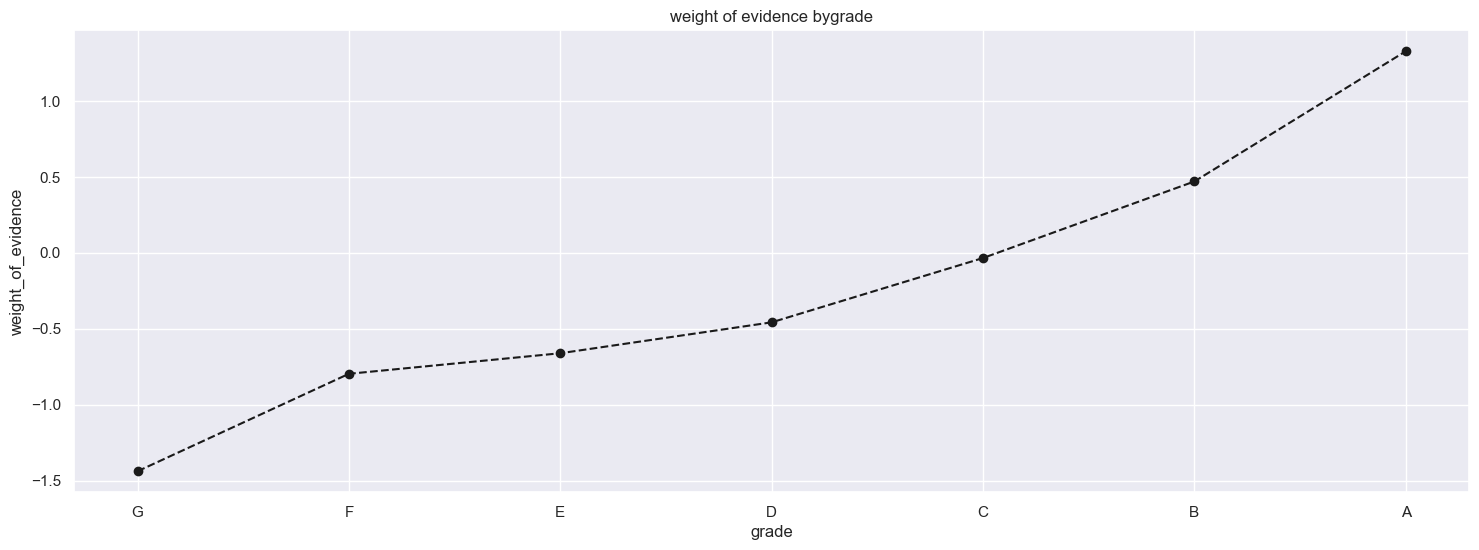

In [244]:
plot_by_woe(df_temp)

In [245]:
df_temp=woe_discrete(df_input_prepr,'home_ownership',df_target_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,NONE,10,0.900000,0.000107,9.0,1.0,0.000098,0.000581,-1.776602,NaN,NaN,0.011061
1,OTHER,45,0.933333,0.000483,42.0,3.0,0.000459,0.001743,-1.334769,0.033333,0.441833,0.011061
2,RENT,37874,0.979669,0.406125,37104.0,770.0,0.405349,0.447414,-0.098737,0.046336,1.236032,0.011061
3,OWN,8409,0.981211,0.090170,8251.0,158.0,0.090139,0.091807,-0.018332,0.001541,0.080405,0.011061
4,MORTGAGE,46919,0.983184,0.503115,46130.0,789.0,0.503955,0.458454,0.094626,0.001973,0.112958,0.011061


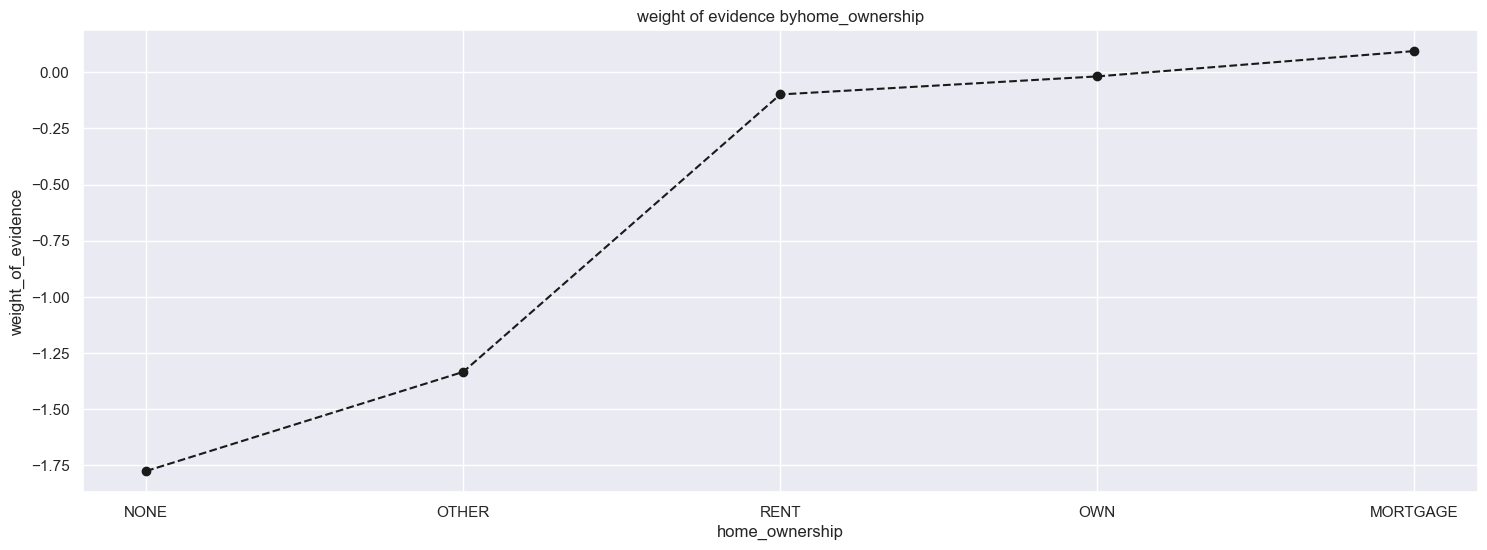

In [246]:
plot_by_woe(df_temp)

In [247]:
df_input_prepr['home_ownership:RENT_OTHER_NONE_ANY']=sum([df_input_prepr['home_ownership:RENT'],df_input_prepr['home_ownership:OTHER'],df_input_prepr['home_ownership:NONE'],
                                                          df_input_prepr['home_ownership:ANY']])

In [248]:
df_input_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [249]:
df_temp=woe_discrete(df_input_prepr,'addr_state',df_target_prepr)
df_temp

C:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000581,-inf,NaN,NaN,inf
1,HI,486,0.971193,0.005211,472.0,14.0,0.005156,0.008135,-0.455905,0.971193,inf,inf
2,SD,179,0.972067,0.001919,174.0,5.0,0.001901,0.002905,-0.424209,0.000874,0.031696,inf
3,NV,1298,0.972265,0.013919,1262.0,36.0,0.013787,0.020918,-0.416893,0.000198,0.007317,inf
4,MT,293,0.972696,0.003142,285.0,8.0,0.003114,0.004648,-0.400779,0.000431,0.016114,inf
5,NM,513,0.974659,0.005501,500.0,13.0,0.005462,0.007554,-0.324168,0.001963,0.076611,inf
6,VA,2856,0.976541,0.030625,2789.0,67.0,0.030469,0.038931,-0.245081,0.001882,0.079087,inf
7,OK,833,0.977191,0.008932,814.0,19.0,0.008893,0.011040,-0.216305,0.000650,0.028776,inf
8,NC,2478,0.978612,0.026572,2425.0,53.0,0.026492,0.030796,-0.150532,0.001421,0.065774,inf
9,GA,3015,0.979104,0.032330,2952.0,63.0,0.032250,0.036607,-0.126723,0.000493,0.023809,inf


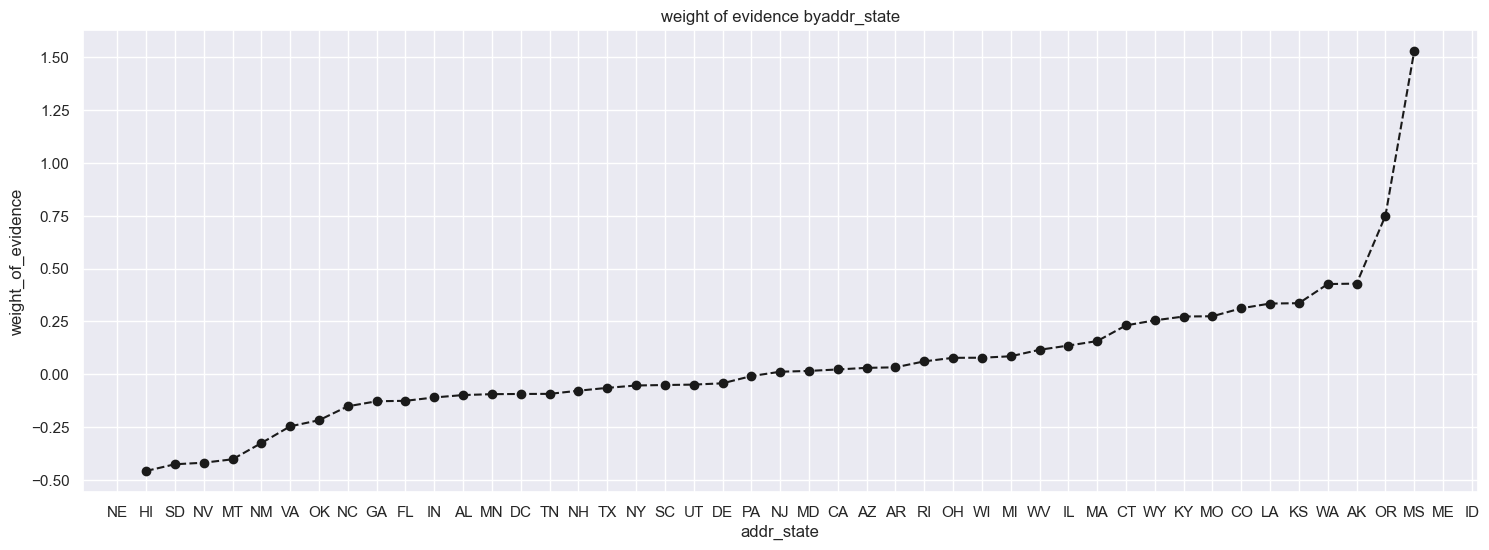

In [250]:
plot_by_woe(df_temp)

In [251]:
if['addr_state:ND']in df_input_prepr.columns.values:
    pass
else:
    df_input_prepr['addr_state:ND']=0

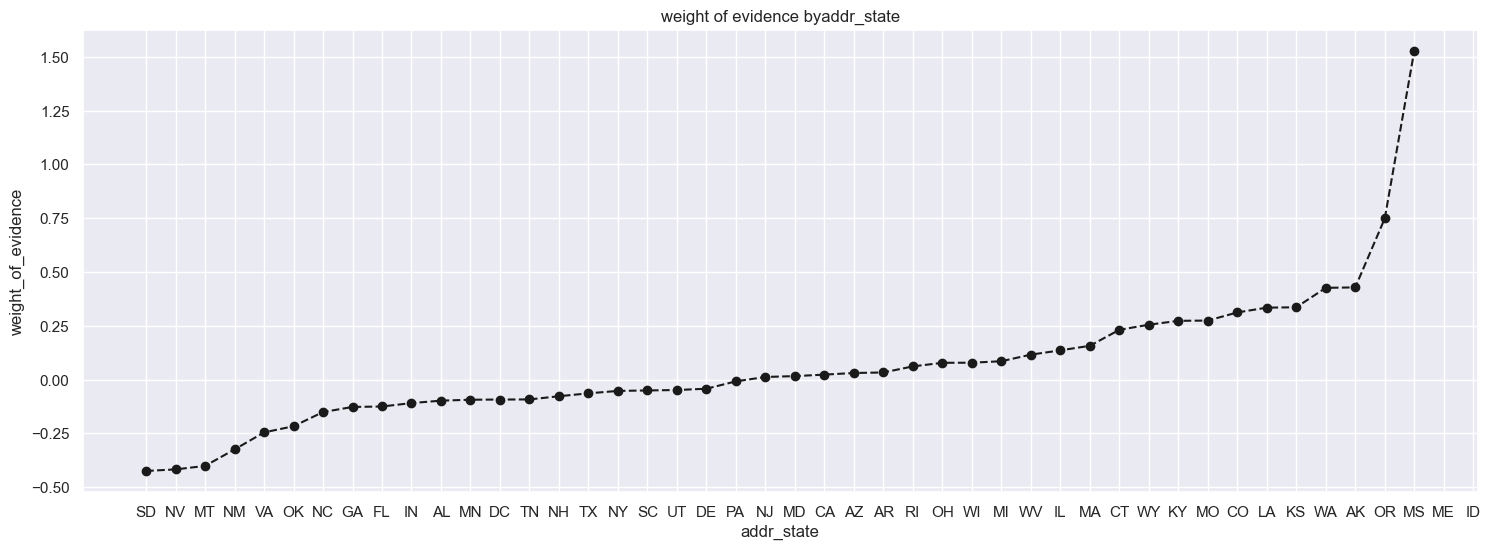

In [252]:
plot_by_woe(df_temp.iloc[2: -2,:])

In [253]:
df_input_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_input_prepr['addr_state:ND'], df_input_prepr['addr_state:NE'],
                                                         df_input_prepr['addr_state:IA'], df_input_prepr['addr_state:NV'],
                                                         df_input_prepr['addr_state:FL'], df_input_prepr['addr_state:HI'],
                                                         df_input_prepr['addr_state:AL']])

df_input_prepr['addr_state:NM_VA'] = sum([df_input_prepr['addr_state:NM'], df_input_prepr['addr_state:VA']])

df_input_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_input_prepr['addr_state:OK'], df_input_prepr['addr_state:TN'],
                                              df_input_prepr['addr_state:MO'], df_input_prepr['addr_state:LA'],
                                              df_input_prepr['addr_state:MD'], df_input_prepr['addr_state:NC']])

df_input_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_input_prepr['addr_state:UT'], df_input_prepr['addr_state:KY'],
                                              df_input_prepr['addr_state:AZ'], df_input_prepr['addr_state:NJ']])

df_input_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_input_prepr['addr_state:AR'], df_input_prepr['addr_state:MI'],
                                              df_input_prepr['addr_state:PA'], df_input_prepr['addr_state:OH'],
                                              df_input_prepr['addr_state:MN']])

df_input_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_input_prepr['addr_state:RI'], df_input_prepr['addr_state:MA'],
                                              df_input_prepr['addr_state:DE'], df_input_prepr['addr_state:SD'],
                                              df_input_prepr['addr_state:IN']])

df_input_prepr['addr_state:GA_WA_OR'] = sum([df_input_prepr['addr_state:GA'], df_input_prepr['addr_state:WA'],
                                              df_input_prepr['addr_state:OR']])

df_input_prepr['addr_state:WI_MT'] = sum([df_input_prepr['addr_state:WI'], df_input_prepr['addr_state:MT']])

df_input_prepr['addr_state:IL_CT'] = sum([df_input_prepr['addr_state:IL'], df_input_prepr['addr_state:CT']])

df_input_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_input_prepr['addr_state:KS'], df_input_prepr['addr_state:SC'],
                                              df_input_prepr['addr_state:CO'], df_input_prepr['addr_state:VT'],
                                              df_input_prepr['addr_state:AK'], df_input_prepr['addr_state:MS']])

df_input_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_input_prepr['addr_state:WV'], df_input_prepr['addr_state:NH'],
                                              df_input_prepr['addr_state:WY'], df_input_prepr['addr_state:DC'],
                                              df_input_prepr['addr_state:ME'], df_input_prepr['addr_state:ID']])


In [254]:
df_temp = woe_discrete(df_input_prepr, 'verification_status', df_target_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,Source Verified,29963,0.979141,0.321295,29338.0,625.0,0.320508,0.363161,-0.124940,NaN,NaN,0.022354
1,Verified,33641,0.980351,0.360734,32980.0,661.0,0.360295,0.384079,-0.063924,0.001210,0.061016,0.022354
2,Not Verified,29653,0.985330,0.317971,29218.0,435.0,0.319197,0.252760,0.233367,0.004979,0.297291,0.022354


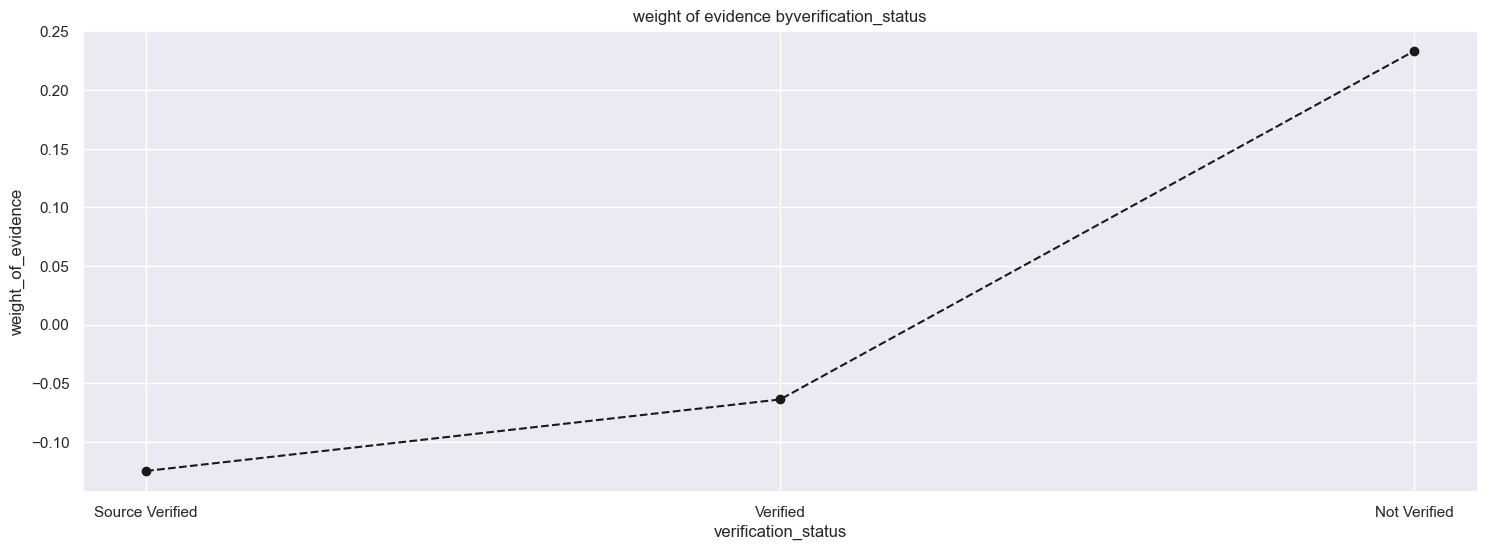

In [255]:
plot_by_woe(df_temp)

In [256]:
df_temp = woe_discrete(df_input_prepr, 'purpose', df_target_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,educational,89,0.910112,0.000954,81.0,8.0,0.000885,0.004648,-1.658819,NaN,NaN,inf
1,small_business,1431,0.971349,0.015345,1390.0,41.0,0.015185,0.023823,-0.450340,0.061236,1.208479,inf
2,other,4806,0.977736,0.051535,4699.0,107.0,0.051335,0.062173,-0.191551,0.006387,0.258789,inf
3,debt_consolidation,55012,0.980495,0.589897,53939.0,1073.0,0.589265,0.623475,-0.056432,0.002759,0.135119,inf
4,medical,918,0.981481,0.009844,901.0,17.0,0.009843,0.009878,-0.003535,0.000986,0.052897,inf
5,home_improvement,5299,0.981695,0.056821,5202.0,97.0,0.056830,0.056363,0.008261,0.000213,0.011796,inf
6,house,439,0.984055,0.004707,432.0,7.0,0.004719,0.004067,0.148689,0.002360,0.140428,inf
7,wedding,456,0.984649,0.004890,449.0,7.0,0.004905,0.004067,0.187286,0.000594,0.038597,inf
8,major_purchase,1991,0.984932,0.021350,1961.0,30.0,0.021423,0.017432,0.206186,0.000283,0.018900,inf
9,moving,602,0.985050,0.006455,593.0,9.0,0.006478,0.005230,0.214143,0.000118,0.007957,inf


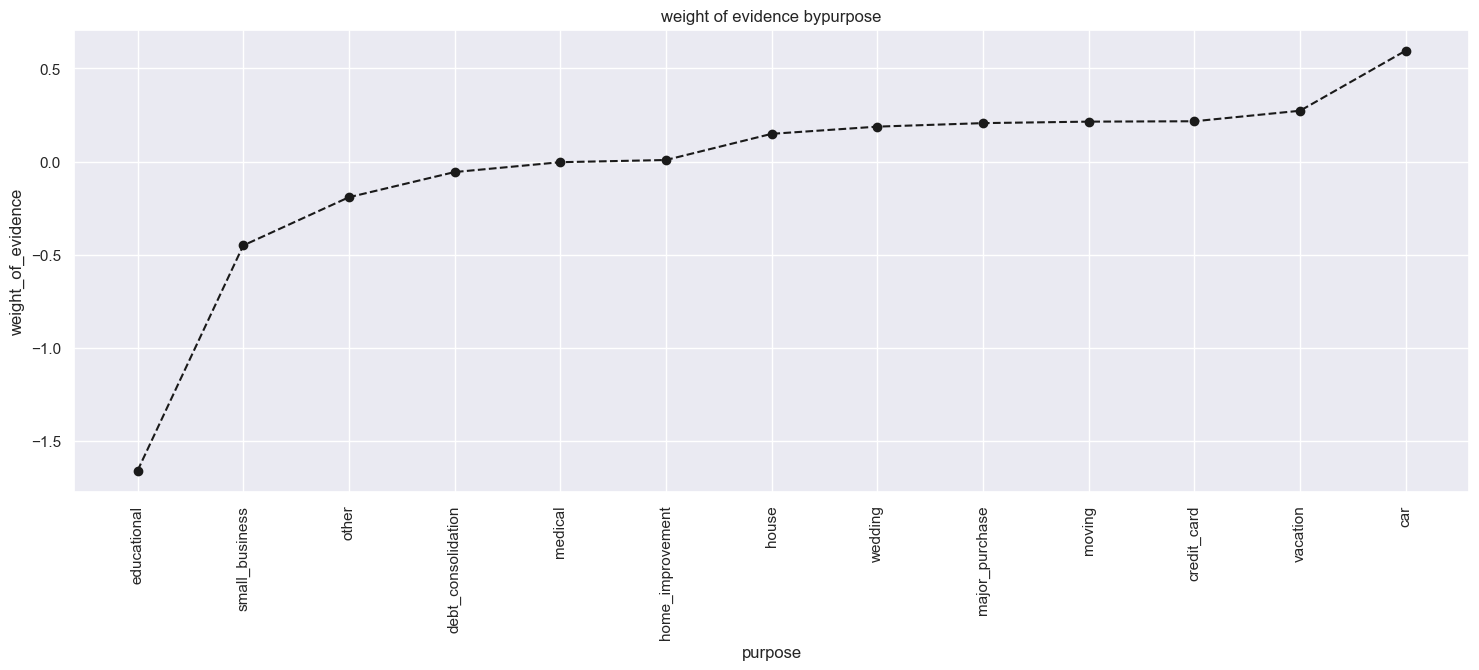

In [257]:
plot_by_woe(df_temp, 90)

In [258]:
df_input_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_input_prepr['purpose:educational'], df_input_prepr['purpose:small_business'],
                                                                 df_input_prepr['purpose:wedding'], df_input_prepr['purpose:renewable_energy'],
                                                                 df_input_prepr['purpose:moving'], df_input_prepr['purpose:house']])
df_input_prepr['purpose:oth__med__vacation'] = sum([df_input_prepr['purpose:other'], df_input_prepr['purpose:medical'],
                                             df_input_prepr['purpose:vacation']])
df_input_prepr['purpose:major_purch__car__home_impr'] = sum([df_input_prepr['purpose:major_purchase'], df_input_prepr['purpose:car'],
                                                        df_input_prepr['purpose:home_improvement']])


In [259]:
df_temp = woe_discrete(df_input_prepr, 'initial_list_status', df_target_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,w,32766,0.979491,0.351352,32094.0,672.0,0.350616,0.390471,-0.107661,NaN,NaN,0.006815
1,f,60491,0.982659,0.648648,59442.0,1049.0,0.649384,0.609529,0.063337,0.003168,0.170998,0.006815


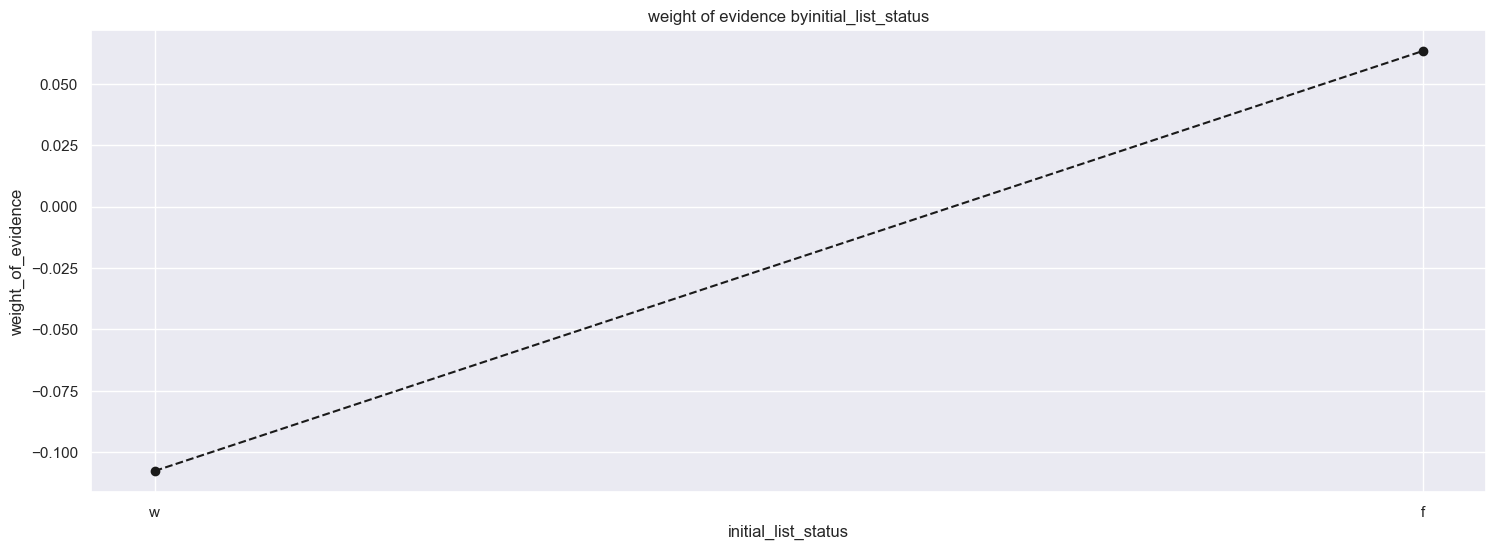

In [260]:
plot_by_woe(df_temp)

### Preprocessing Continuous variables

In [261]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
    ], axis=1)

    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']

    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']

    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()

    df['woe'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['woe']).reset_index(drop=True)

    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()

    # Information Value
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['woe']
    IV_total = df['IV'].sum()
    df['IV'] = IV_total   # store total IV in each row if needed

    return df


In [262]:
df_temp=woe_ordered_continuous(df_input_prepr,'term_int',df_target_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,36,67534,0.984230,0.724171,66469.0,1065.0,0.726151,0.618826,0.159934,NaN,NaN,0.052655
1,60,25723,0.974498,0.275829,25067.0,656.0,0.273849,0.381174,-0.330680,0.009733,0.490614,0.052655


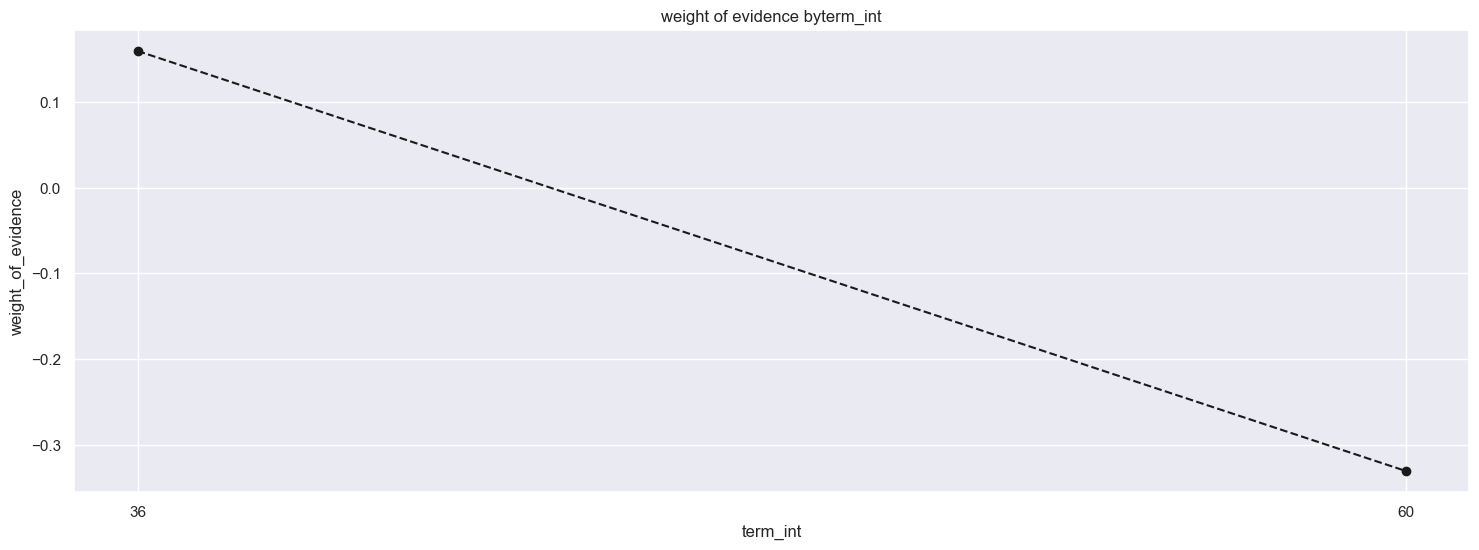

In [263]:
plot_by_woe(df_temp)

In [264]:
df_input_prepr['term:36']=np.where((df_input_prepr['term_int']==36),1,0)
df_input_prepr['term:60']=np.where((df_input_prepr['term_int']==60),1,0)

In [265]:
df_temp=woe_ordered_continuous(df_input_prepr,'emp_length_int',df_target_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,0.0,11553,0.977668,0.123883,11295.0,258.0,0.123394,0.149913,-0.194671,NaN,NaN,0.012294
1,1.0,5968,0.980060,0.063995,5849.0,119.0,0.063898,0.069146,-0.078924,0.002392,0.115747,0.012294
2,2.0,8295,0.981917,0.088948,8145.0,150.0,0.088981,0.087159,0.020697,0.001856,0.099622,0.012294
3,3.0,7391,0.981735,0.079254,7256.0,135.0,0.079269,0.078443,0.010482,0.000182,0.010215,0.012294
4,4.0,5555,0.979478,0.059567,5441.0,114.0,0.059441,0.066241,-0.108307,0.002257,0.118790,0.012294
5,5.0,6172,0.983960,0.066183,6073.0,99.0,0.066345,0.057525,0.142661,0.004482,0.250968,0.012294
6,6.0,5225,0.980670,0.056028,5124.0,101.0,0.055978,0.058687,-0.047257,0.003290,0.189918,0.012294
7,7.0,5131,0.983824,0.055020,5048.0,83.0,0.055148,0.048228,0.134080,0.003154,0.181337,0.012294
8,8.0,4542,0.979745,0.048704,4450.0,92.0,0.048615,0.053457,-0.094956,0.004079,0.229036,0.012294
9,9.0,3621,0.985363,0.038828,3568.0,53.0,0.038979,0.030796,0.235642,0.005619,0.330598,0.012294


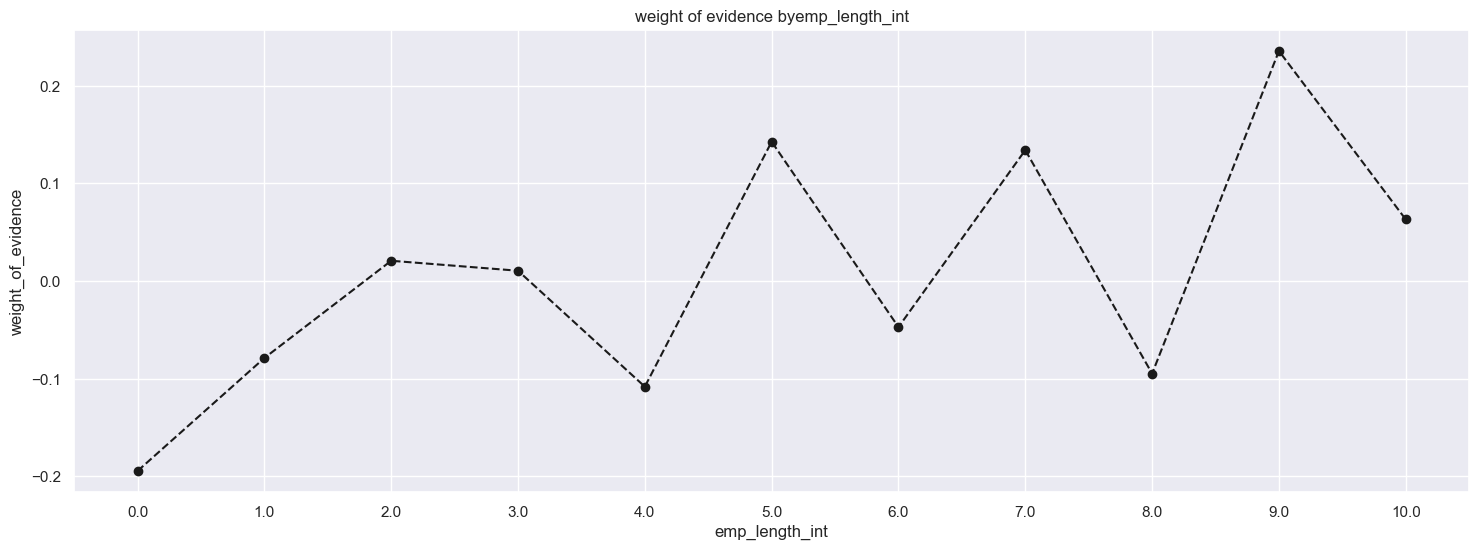

In [266]:
plot_by_woe(df_temp)

In [267]:
df_input_prepr['emp_length:0']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:1']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:2']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:3']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:4-5']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:6']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:7']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:8']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:9']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)
df_input_prepr['emp_length:10']=np.where(df_input_prepr['emp_length_int'].isin([0]),1,0)

In [268]:
df_input_prepr['mnth_since_issue_date'].unique()

array([ 42.,  39.,  67.,  38.,  59.,  51.,  87.,  52.,  49.,  60.,  73.,
        78.,  48.,  47.,  57.,  56., 121.,  64., 104.,  40.,  54.,  41.,
        53.,  44.,  50.,  58.,  46.,  37.,  55.,  75.,  45.,  74., 105.,
        71.,  96.,  90.,  69.,  83.,  72.,  77., 106.,  66.,  81.,  92.,
        76.,  68.,  43.,  62.,  65.,  61.,  86.,  89., 112.,  97.,  79.,
        84.,  70.,  91.,  63., 110.,  80.,  93., 120., 100.,  82., 117.,
        98., 116., 118., 101.,  94., 119., 108., 126., 102., 127.,  88.,
        85.,  95., 107., 111.,  99., 109., 114., 115., 124., 113., 122.,
       123., 125., 128.])

In [269]:
df_input_prepr['mnth_since_issue_d_factor']=pd.cut(df_input_prepr['mnth_since_issue_date'],50)

In [270]:
df_input_prepr['mnth_since_issue_d_factor']

362514     (40.64, 42.46]
288564     (38.82, 40.64]
213591     (66.12, 67.94]
263083    (36.909, 38.82]
165001     (58.84, 60.66]
               ...       
115         (71.58, 73.4]
296284     (38.82, 40.64]
61777      (49.74, 51.56]
91763      (51.56, 53.38]
167512     (58.84, 60.66]
Name: mnth_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(36.909, 38.82] < (38.82, 40.64] < (40.64, 42.46] < (42.46, 44.28] ... (120.72, 122.54] < (122.54, 124.36] < (124.36, 126.18] < (126.18, 128.0]]

In [271]:
df_temp=woe_ordered_continuous(df_input_prepr,'mnth_since_issue_d_factor',df_target_prepr)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


In [272]:
df_temp

,mnth_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(36.909, 38.82]",7191,0.979419,0.077109,7043.0,148.0,0.076942,0.085997,-0.111250,NaN,NaN,inf
1,"(38.82, 40.64]",9752,0.975800,0.104571,9516.0,236.0,0.103959,0.137130,-0.276929,0.003619,0.165679,inf
2,"(40.64, 42.46]",9506,0.977067,0.101933,9288.0,218.0,0.101468,0.126671,-0.221843,0.001267,0.055085,inf
3,"(42.46, 44.28]",7240,0.975414,0.077635,7062.0,178.0,0.077150,0.103428,-0.293127,0.001653,0.071283,inf
4,"(44.28, 46.1]",7217,0.978523,0.077388,7062.0,155.0,0.077150,0.090064,-0.154768,0.003109,0.138358,inf
5,"(46.1, 47.92]",3104,0.979059,0.033284,3039.0,65.0,0.033200,0.037769,-0.128930,0.000536,0.025838,inf
6,"(47.92, 49.74]",6197,0.976763,0.066451,6053.0,144.0,0.066127,0.083672,-0.235331,0.002296,0.106401,inf
7,"(49.74, 51.56]",5821,0.978698,0.062419,5697.0,124.0,0.062238,0.072051,-0.146413,0.001935,0.088917,inf
8,"(51.56, 53.38]",5021,0.985262,0.053840,4947.0,74.0,0.054044,0.042998,0.228645,0.006564,0.375058,inf
9,"(53.38, 55.2]",4497,0.988214,0.048222,4444.0,53.0,0.048549,0.030796,0.455191,0.002952,0.226547,inf


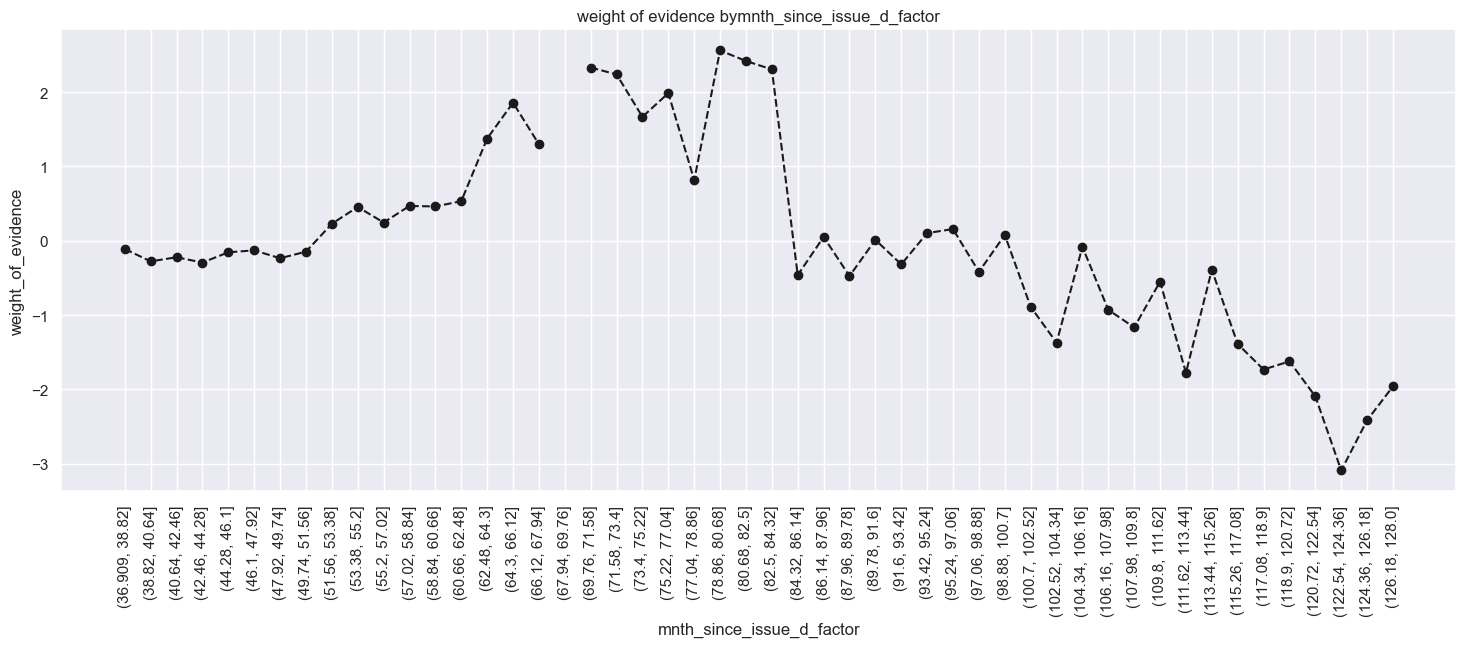

In [273]:
plot_by_woe(df_temp,90)

In [274]:
df_input_prepr['mnth_since_issue_date:<46']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(46)),1,0)
df_input_prepr['mnth_since_issue_date:46-57']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(46,57)),1,0)
df_input_prepr['mnth_since_issue_date:57-62']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(57,62)),1,0)
df_input_prepr['mnth_since_issue_date:62-67']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(62,67)),1,0)
df_input_prepr['mnth_since_issue_date:67-73']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(67,73)),1,0)
df_input_prepr['mnth_since_issue_date:73-78']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(73,78)),1,0)
df_input_prepr['mnth_since_issue_date:78-86']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(78,86)),1,0)
df_input_prepr['mnth_since_issue_date:86-102']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(86,102)),1,0)
df_input_prepr['mnth_since_issue_date:102-111']=np.where(df_input_prepr['mnth_since_issue_date'].isin(range(102,111)),1,0)
df_input_prepr['mnth_since_issue_date:>111'] = np.where(df_input_prepr['mnth_since_issue_date'] > 111, 1, 0)



In [275]:
df_input_prepr['int_rate_factor']=pd.cut(df_input_prepr['int_rate'],50)

In [276]:
df_temp=woe_ordered_continuous(df_input_prepr,'int_rate_factor',df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(5.399, 5.833]",198,1.000000,0.002123,198.0,0.0,0.002163,0.000000,inf,NaN,NaN,inf
1,"(5.833, 6.246]",2086,0.999041,0.022368,2084.0,2.0,0.022767,0.001162,2.975070,0.000959,inf,inf
2,"(6.246, 6.658]",1974,0.995441,0.021167,1965.0,9.0,0.021467,0.005230,1.412196,0.003600,1.562874,inf
3,"(6.658, 7.071]",477,0.997904,0.005115,476.0,1.0,0.005200,0.000581,2.191591,0.002463,0.779395,inf
4,"(7.071, 7.484]",804,0.995025,0.008621,800.0,4.0,0.008740,0.002324,1.324491,0.002879,0.867100,inf
5,"(7.484, 7.897]",3245,0.995686,0.034796,3231.0,14.0,0.035298,0.008135,1.467663,0.000661,0.143172,inf
6,"(7.897, 8.31]",2429,0.994236,0.026046,2415.0,14.0,0.026383,0.008135,1.176570,0.001449,0.291092,inf
7,"(8.31, 8.722]",1680,0.990476,0.018015,1664.0,16.0,0.018179,0.009297,0.670564,0.003760,0.506006,inf
8,"(8.722, 9.135]",2384,0.992869,0.025564,2367.0,17.0,0.025859,0.009878,0.962338,0.002393,0.291774,inf
9,"(9.135, 9.548]",1590,0.991824,0.017050,1577.0,13.0,0.017228,0.007554,0.824503,0.001045,0.137835,inf


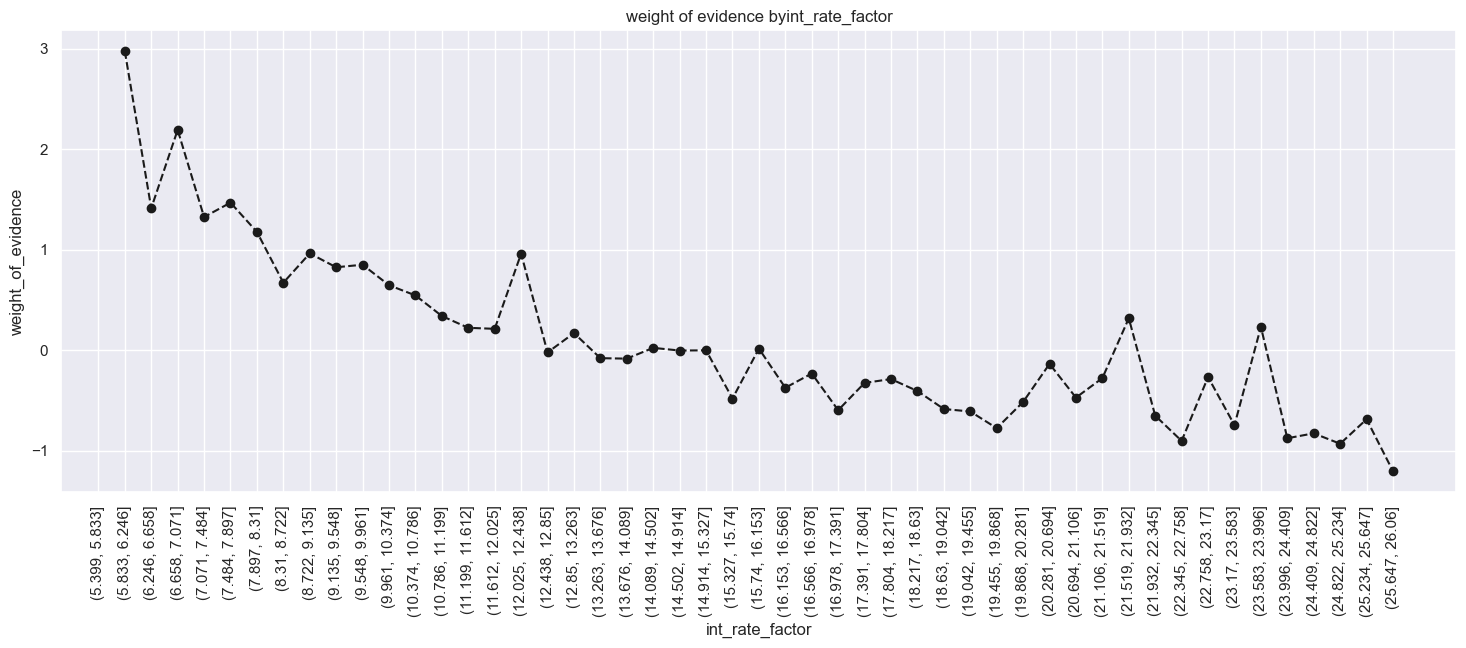

In [277]:
plot_by_woe(df_temp,90)

In [278]:
df_input_prepr['int_rate_factor:<9.548']=np.where((df_input_prepr['int_rate']<=9.548),1,0)
df_input_prepr['int_rate_factor:9.548-12.025']=np.where((df_input_prepr['int_rate']>9.548) & (df_input_prepr['int_rate']<=12.025),1,0)
df_input_prepr['int_rate_factor:12.025-15.74']=np.where((df_input_prepr['int_rate']>12.025) & (df_input_prepr['int_rate']<=15.74),1,0)
df_input_prepr['int_rate_factor:15.74-20.281']=np.where((df_input_prepr['int_rate']>15.74) & (df_input_prepr['int_rate']<=20.281),1,0)
df_input_prepr['int_rate_factor:>20.281']=np.where((df_input_prepr['int_rate']>20.281),1,0)

In [279]:
df_input_prepr['funded_amnt_factor']=pd.cut(df_input_prepr['funded_amnt'],50)

In [280]:
df_temp=woe_ordered_continuous(df_input_prepr,'funded_amnt_factor',df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(465.5, 1190.0]",319,0.984326,0.003421,314.0,5.0,0.003430,0.002905,0.166128,NaN,NaN,0.045529
1,"(1190.0, 1880.0]",800,0.995000,0.008578,796.0,4.0,0.008696,0.002324,1.319478,0.010674,1.153350,0.045529
2,"(1880.0, 2570.0]",1513,0.985459,0.016224,1491.0,22.0,0.016289,0.012783,0.242333,0.009541,1.077145,0.045529
3,"(2570.0, 3260.0]",1817,0.988993,0.019484,1797.0,20.0,0.019632,0.011621,0.524315,0.003533,0.281982,0.045529
4,"(3260.0, 3950.0]",1245,0.977510,0.013350,1217.0,28.0,0.013295,0.016270,-0.201887,0.011483,0.726202,0.045529
5,"(3950.0, 4640.0]",2298,0.980418,0.024642,2253.0,45.0,0.024613,0.026148,-0.060471,0.002908,0.141416,0.045529
6,"(4640.0, 5330.0]",3957,0.983573,0.042431,3892.0,65.0,0.042519,0.037769,0.118464,0.003156,0.178936,0.045529
7,"(5330.0, 6020.0]",4186,0.986622,0.044887,4130.0,56.0,0.045119,0.032539,0.326854,0.003049,0.208390,0.045529
8,"(6020.0, 6710.0]",1718,0.983702,0.018422,1690.0,28.0,0.018463,0.016270,0.126452,0.002920,0.200402,0.045529
9,"(6710.0, 7400.0]",2880,0.979861,0.030882,2822.0,58.0,0.030829,0.033701,-0.089069,0.003841,0.215521,0.045529


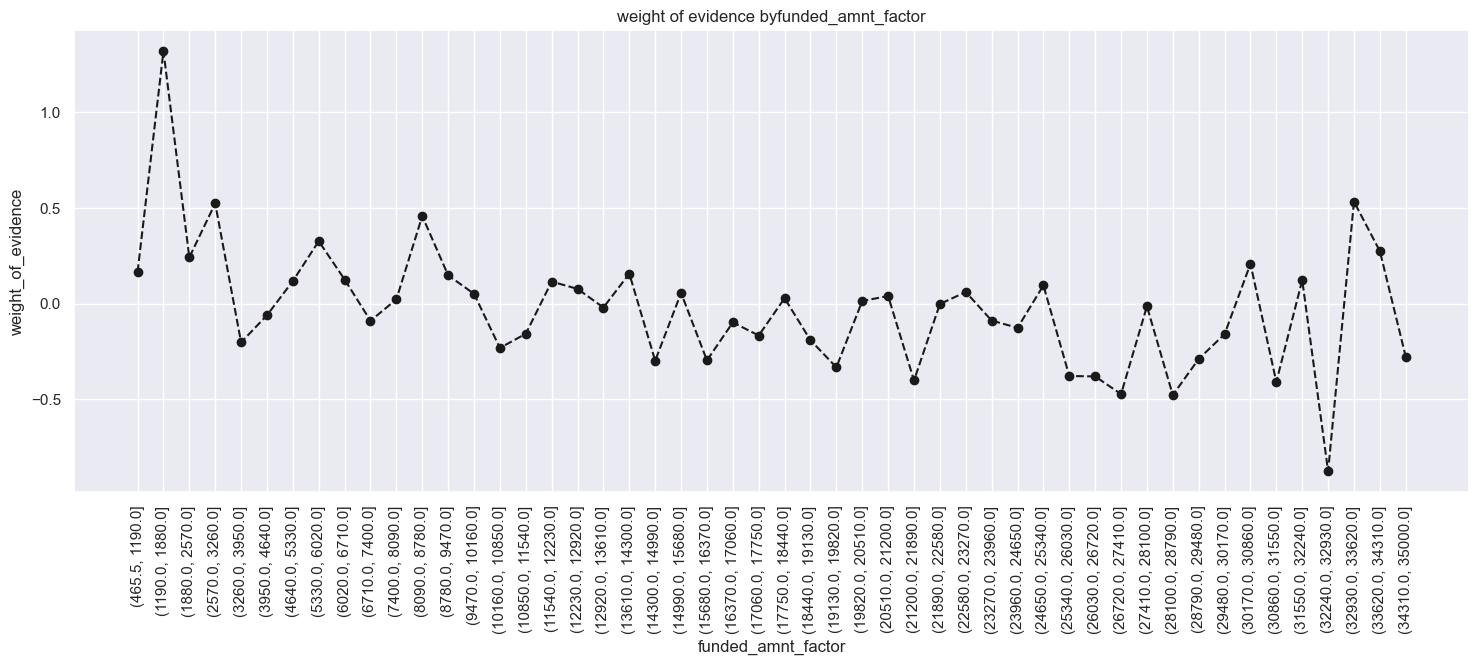

In [281]:
plot_by_woe(df_temp,90)

In [282]:
df_input_prepr['mnths_since_earliest_cr_line_factor'] = pd.cut(df_input_prepr['mnth_since_earliest_cr_line_date'], 50)
df_temp = woe_ordered_continuous(df_input_prepr, 'mnths_since_earliest_cr_line_factor', df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


,mnths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.596, 11.92]",5,1.000000,0.000054,5.0,0.0,0.000055,0.000000,inf,NaN,NaN,inf
1,"(11.92, 23.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.84, 35.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.76, 47.68]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(47.68, 59.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(59.6, 71.52]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(71.52, 83.44]",182,0.978022,0.001952,178.0,4.0,0.001945,0.002324,-0.178338,NaN,NaN,inf
7,"(83.44, 95.36]",548,0.979927,0.005876,537.0,11.0,0.005867,0.006392,-0.085724,0.001905,0.092614,inf
8,"(95.36, 107.28]",675,0.962963,0.007238,650.0,25.0,0.007101,0.014526,-0.715730,0.016964,0.630006,inf
9,"(107.28, 119.2]",1268,0.977129,0.013597,1239.0,29.0,0.013536,0.016851,-0.219063,0.014166,0.496668,inf


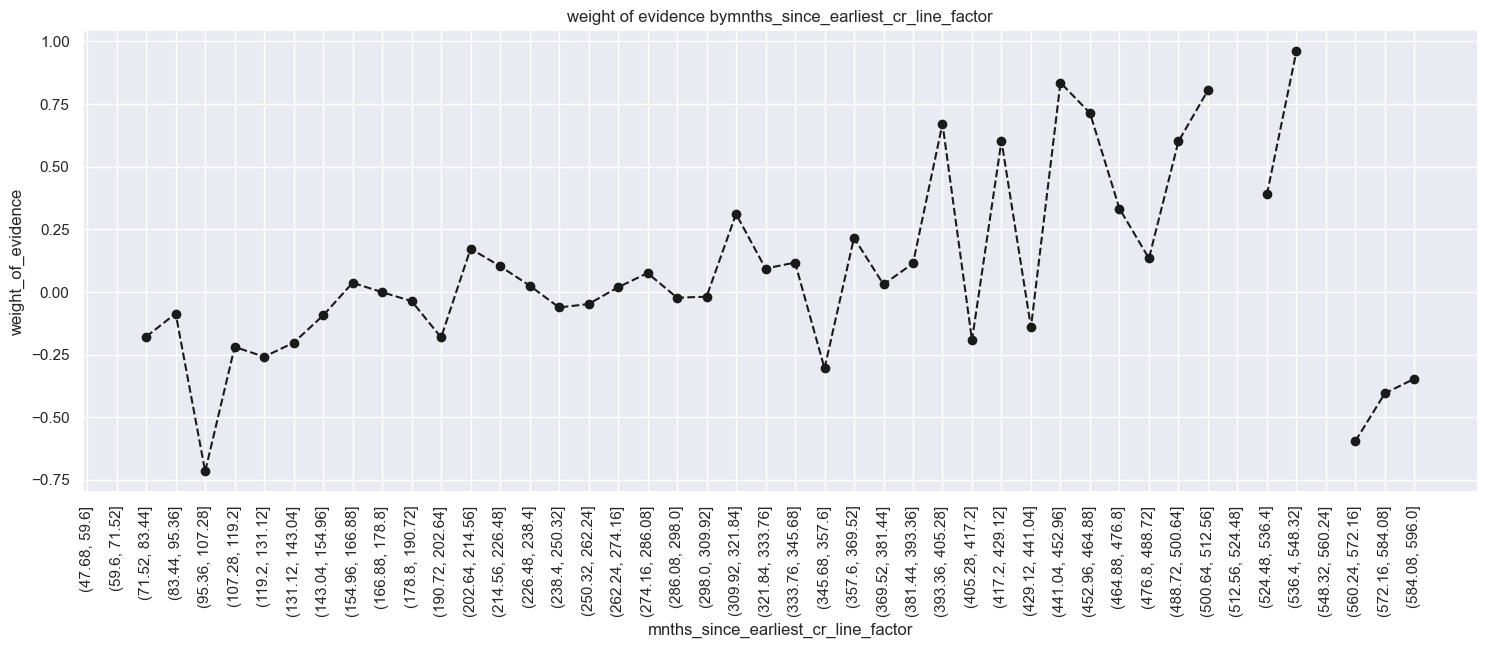

In [283]:
plot_by_woe(df_temp,90)

In [284]:
df_input_prepr['mnth_since_earliest_cr_line_date:<140'] = np.where(df_input_prepr['mnth_since_earliest_cr_line_date'].isin(range(140)), 1, 0)
df_input_prepr['mnth_since_earliest_cr_line_date:141-164'] = np.where(df_input_prepr['mnth_since_earliest_cr_line_date'].isin(range(140, 165)), 1, 0)
df_input_prepr['mnth_since_earliest_cr_line_date:165-247'] = np.where(df_input_prepr['mnth_since_earliest_cr_line_date'].isin(range(165, 248)), 1, 0)
df_input_prepr['mnth_since_earliest_cr_line_date:248-270'] = np.where(df_input_prepr['mnth_since_earliest_cr_line_date'].isin(range(248, 271)), 1, 0)
df_input_prepr['mnth_since_earliest_cr_line_date:271-352'] = np.where(df_input_prepr['mnth_since_earliest_cr_line_date'].isin(range(271, 353)), 1, 0)
df_input_prepr['mnth_since_earliest_cr_line_date:>352'] = np.where(df_input_prepr['mnth_since_earliest_cr_line_date'].isin(range(353, int(df_input_prepr['mnth_since_earliest_cr_line_date'].max()))), 1, 0)

In [285]:
df_temp = woe_ordered_continuous(df_input_prepr, 'delinq_2yrs', df_target_prepr)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,0.0,76566,0.982642,0.821021,75237.0,1329.0,0.821939,0.772225,0.062390,NaN,NaN,inf
1,1.0,11297,0.977605,0.121138,11044.0,253.0,0.120652,0.147008,-0.197574,0.005038,0.259963,inf
2,2.0,3192,0.973371,0.034228,3107.0,85.0,0.033943,0.049390,-0.375065,0.004234,0.177491,inf
3,3.0,1134,0.974427,0.012160,1105.0,29.0,0.012072,0.016851,-0.333522,0.001056,0.041543,inf
4,4.0,510,0.976471,0.005469,498.0,12.0,0.005440,0.006973,-0.248133,0.002044,0.085389,inf
5,5.0,270,0.981481,0.002895,265.0,5.0,0.002895,0.002905,-0.003535,0.005011,0.244598,inf
6,6.0,128,0.968750,0.001373,124.0,4.0,0.001355,0.002324,-0.539840,0.012731,0.536305,inf
7,7.0,67,1.000000,0.000718,67.0,0.0,0.000732,0.000000,inf,0.031250,inf,inf
8,8.0,29,1.000000,0.000311,29.0,0.0,0.000317,0.000000,inf,0.000000,NaN,inf
9,9.0,22,0.954545,0.000236,21.0,1.0,0.000229,0.000581,-0.929304,0.045455,inf,inf


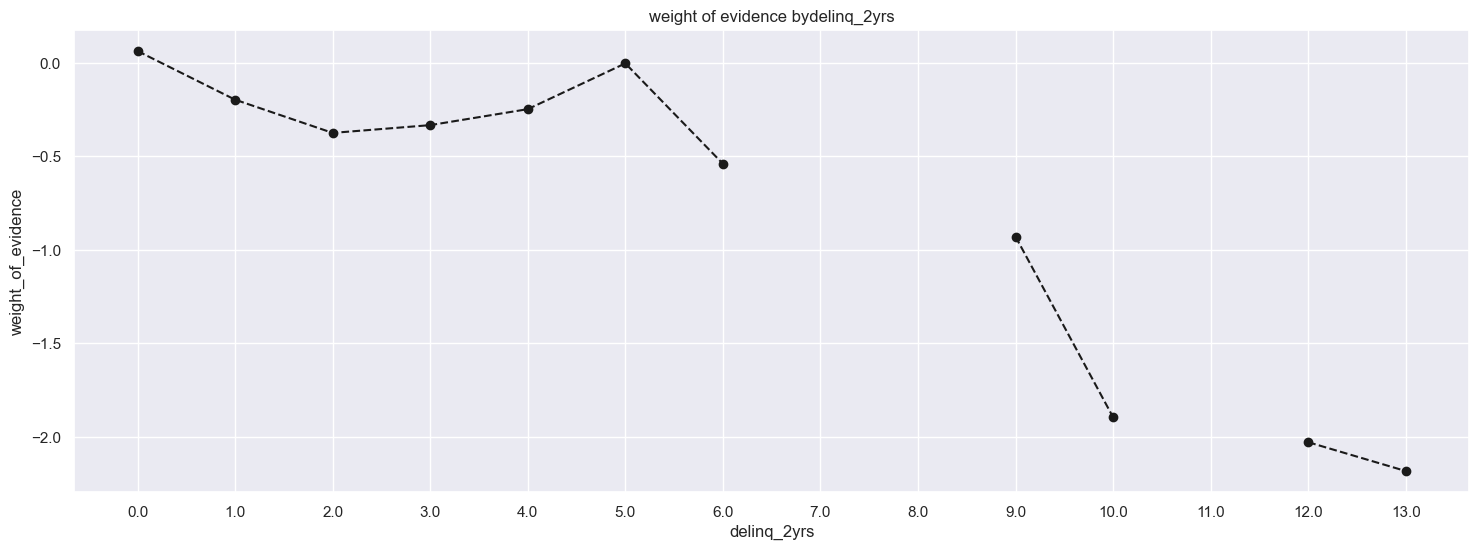

In [286]:
plot_by_woe(df_temp)

In [287]:
df_input_prepr['delinq_2yrs:0'] = np.where((df_input_prepr['delinq_2yrs'] == 0), 1, 0)
df_input_prepr['delinq_2yrs:1-3'] = np.where((df_input_prepr['delinq_2yrs'] >= 1) & (df_input_prepr['delinq_2yrs'] <= 3), 1, 0)
df_input_prepr['delinq_2yrs:>=4'] = np.where((df_input_prepr['delinq_2yrs'] >= 9), 1, 0)

In [288]:
df_temp = woe_ordered_continuous(df_input_prepr, 'inq_last_6mths', df_target_prepr)
df_temp

C:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,0.0,48295,0.984346,0.517870,47539.0,756.0,0.519348,0.439279,0.167438,NaN,NaN,inf
1,1.0,25985,0.980758,0.278639,25485.0,500.0,0.278415,0.290529,-0.042590,0.003588,0.210027,inf
2,2.0,11611,0.980966,0.124505,11390.0,221.0,0.124432,0.128414,-0.031498,0.000208,0.011091,inf
3,3.0,5086,0.983681,0.054537,5003.0,83.0,0.054656,0.048228,0.125126,0.002714,0.156624,inf
4,4.0,1431,0.950384,0.015345,1360.0,71.0,0.014858,0.041255,-1.021267,0.033296,1.146392,inf
5,5.0,551,0.931034,0.005908,513.0,38.0,0.005604,0.022080,-1.371137,0.019350,0.349870,inf
6,6.0,211,0.895735,0.002263,189.0,22.0,0.002065,0.012783,-1.823122,0.035300,0.451985,inf
7,7.0,36,0.638889,0.000386,23.0,13.0,0.000251,0.007554,-3.403282,0.256846,1.580160,inf
8,8.0,21,0.571429,0.000225,12.0,9.0,0.000131,0.005230,-3.686145,0.067460,0.282863,inf
9,9.0,7,0.428571,0.000075,3.0,4.0,0.000033,0.002324,-4.261509,0.142857,0.575364,inf


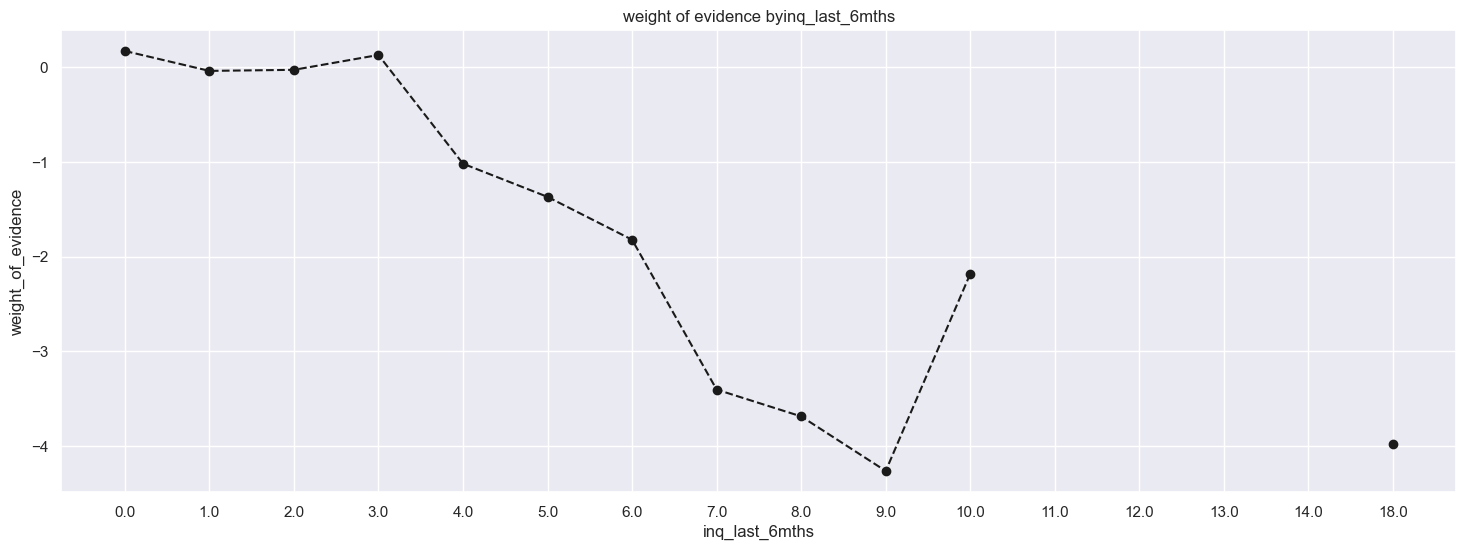

In [289]:
plot_by_woe(df_temp)

In [290]:
df_input_prepr['inq_last_6mths:0'] = np.where((df_input_prepr['inq_last_6mths'] == 0), 1, 0)
df_input_prepr['inq_last_6mths:1-2'] = np.where((df_input_prepr['inq_last_6mths'] >= 1) & (df_input_prepr['inq_last_6mths'] <= 2), 1, 0)
df_input_prepr['inq_last_6mths:3-6'] = np.where((df_input_prepr['inq_last_6mths'] >= 3) & (df_input_prepr['inq_last_6mths'] <= 6), 1, 0)
df_input_prepr['inq_last_6mths:>6'] = np.where((df_input_prepr['inq_last_6mths'] > 6), 1, 0)

In [291]:
df_temp = woe_ordered_continuous(df_input_prepr, 'open_acc', df_target_prepr)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000076,0.000000,inf,NaN,NaN,inf
1,1.0,32,0.875000,0.000343,28.0,4.0,0.000306,0.002324,-2.027917,0.125000,inf,inf
2,2.0,334,0.991018,0.003582,331.0,3.0,0.003616,0.001743,0.729679,0.116018,2.757596,inf
3,3.0,1122,0.980392,0.012031,1100.0,22.0,0.012017,0.012783,-0.061804,0.010626,0.791483,inf
4,4.0,2560,0.985547,0.027451,2523.0,37.0,0.027563,0.021499,0.248459,0.005155,0.310263,inf
5,5.0,4403,0.984556,0.047214,4335.0,68.0,0.047358,0.039512,0.181142,0.000991,0.067317,inf
6,6.0,6216,0.984878,0.066655,6122.0,94.0,0.066881,0.054619,0.202523,0.000322,0.021380,inf
7,7.0,7433,0.982779,0.079704,7305.0,128.0,0.079805,0.074375,0.070457,0.002098,0.132065,inf
8,8.0,8314,0.981958,0.089151,8164.0,150.0,0.089189,0.087159,0.023027,0.000821,0.047430,inf
9,9.0,8768,0.980725,0.094020,8599.0,169.0,0.093941,0.098199,-0.044324,0.001233,0.067352,inf


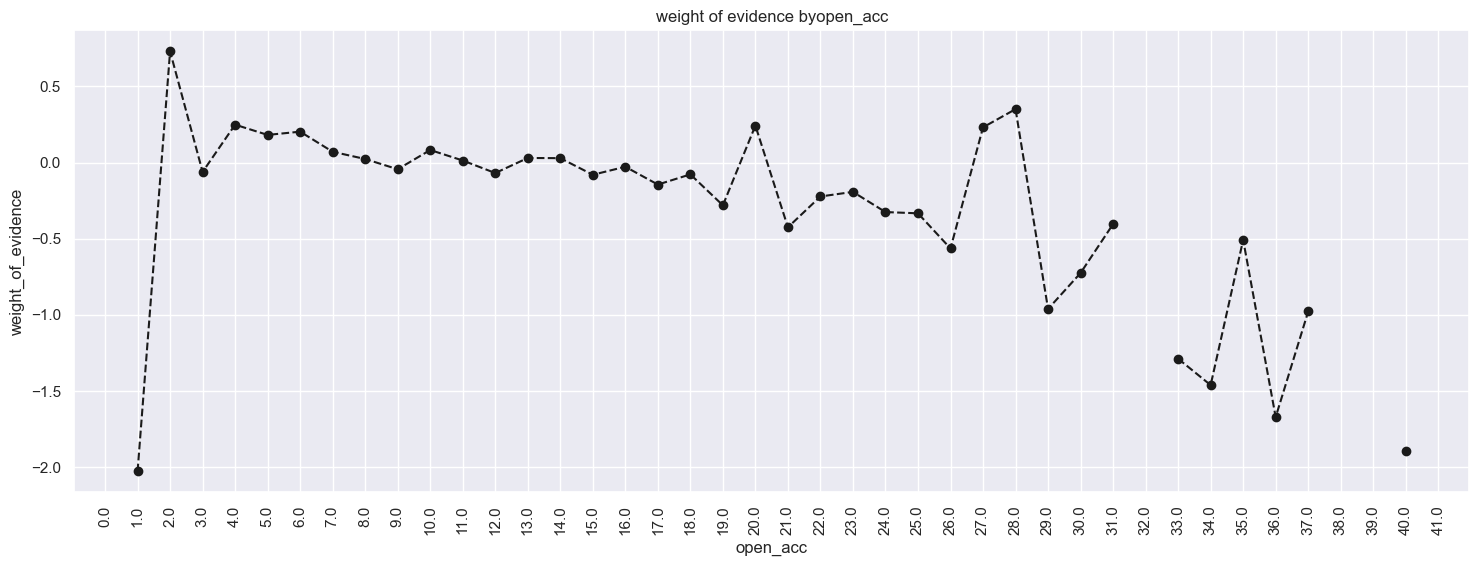

In [292]:
plot_by_woe(df_temp, 90)

In [293]:
df_input_prepr['open_acc:0'] = np.where((df_input_prepr['open_acc'] == 0), 1, 0)
df_input_prepr['open_acc:1-3'] = np.where((df_input_prepr['open_acc'] >= 1) & (df_input_prepr['open_acc'] <= 3), 1, 0)
df_input_prepr['open_acc:4-12'] = np.where((df_input_prepr['open_acc'] >= 4) & (df_input_prepr['open_acc'] <= 12), 1, 0)
df_input_prepr['open_acc:13-17'] = np.where((df_input_prepr['open_acc'] >= 13) & (df_input_prepr['open_acc'] <= 17), 1, 0)
df_input_prepr['open_acc:18-22'] = np.where((df_input_prepr['open_acc'] >= 18) & (df_input_prepr['open_acc'] <= 22), 1, 0)
df_input_prepr['open_acc:23-25'] = np.where((df_input_prepr['open_acc'] >= 23) & (df_input_prepr['open_acc'] <= 25), 1, 0)
df_input_prepr['open_acc:26-30'] = np.where((df_input_prepr['open_acc'] >= 26) & (df_input_prepr['open_acc'] <= 30), 1, 0)
df_input_prepr['open_acc:>=31'] = np.where((df_input_prepr['open_acc'] >= 31), 1, 0)

In [294]:
df_temp = woe_ordered_continuous(df_input_prepr, 'pub_rec', df_target_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,0.0,80923,0.981884,0.867742,79457.0,1466.0,0.868041,0.851830,0.018852,NaN,NaN,inf
1,1.0,10670,0.979850,0.114415,10455.0,215.0,0.114217,0.124927,-0.089629,0.002034,0.108481,inf
2,2.0,1097,0.976299,0.011763,1071.0,26.0,0.011700,0.015107,-0.255575,0.003551,0.165946,inf
3,3.0,331,0.972810,0.003549,322.0,9.0,0.003518,0.005230,-0.396500,0.003489,0.140925,inf
4,4.0,112,0.991071,0.001201,111.0,1.0,0.001213,0.000581,0.735703,0.018262,1.132203,inf
5,5.0,73,0.986301,0.000783,72.0,1.0,0.000787,0.000581,0.302839,0.004770,0.432864,inf
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000186,0.001162,-1.833761,0.091565,2.136600,inf
7,7.0,14,1.000000,0.000150,14.0,0.0,0.000153,0.000000,inf,0.105263,inf,inf
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000044,0.000581,-2.587532,0.200000,inf,inf
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000022,0.000000,inf,0.200000,inf,inf


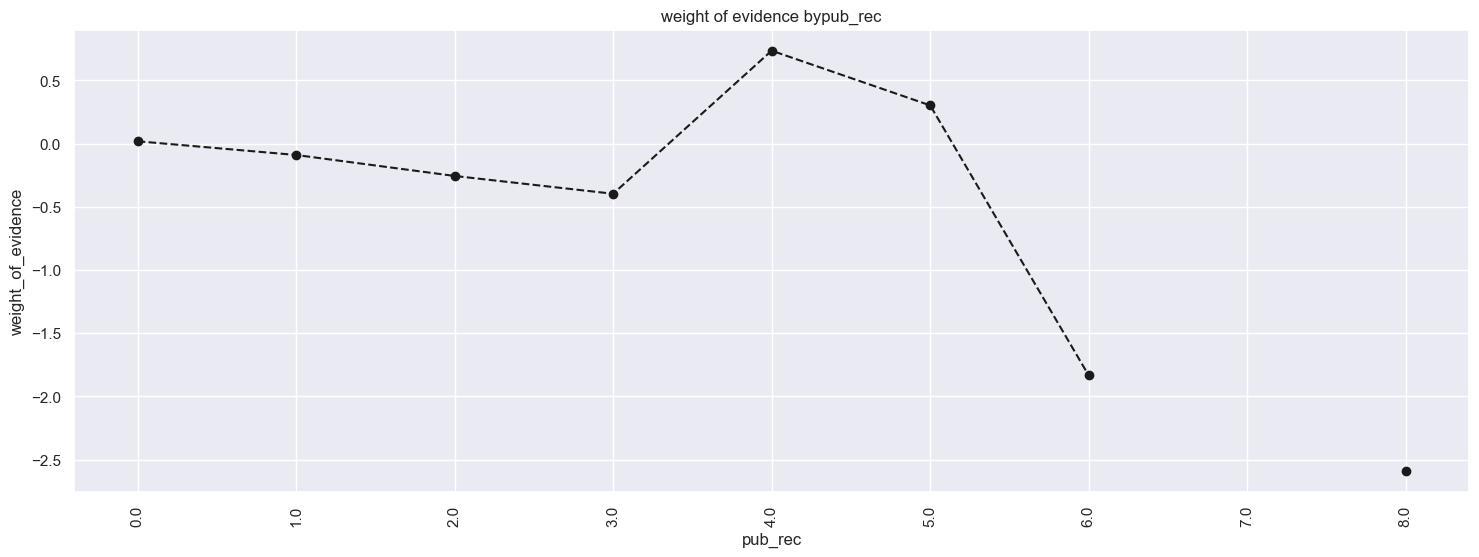

In [295]:
plot_by_woe(df_temp, 90)

In [296]:
df_input_prepr['pub_rec:0-2'] = np.where((df_input_prepr['pub_rec'] >= 0) & (df_input_prepr['pub_rec'] <= 2), 1, 0)
df_input_prepr['pub_rec:3-4'] = np.where((df_input_prepr['pub_rec'] >= 3) & (df_input_prepr['pub_rec'] <= 4), 1, 0)
df_input_prepr['pub_rec:>=5'] = np.where((df_input_prepr['pub_rec'] >= 5), 1, 0)

In [297]:
df_input_prepr['total_acc_factor'] = pd.cut(df_input_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_input_prepr, 'total_acc_factor', df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.156, 3.12]",125,0.952000,0.001340,119.0,6.0,0.001300,0.003486,-0.986463,NaN,NaN,inf
1,"(3.12, 6.24]",1499,0.973316,0.016074,1459.0,40.0,0.015939,0.023242,-0.377200,0.021316,0.609263,inf
2,"(6.24, 9.36]",3715,0.982503,0.039836,3650.0,65.0,0.039875,0.037769,0.054268,0.009188,0.431468,inf
3,"(9.36, 12.48]",6288,0.979167,0.067427,6157.0,131.0,0.067263,0.076119,-0.123679,0.003337,0.177948,inf
4,"(12.48, 15.6]",8289,0.981180,0.088883,8133.0,156.0,0.088850,0.090645,-0.019998,0.002013,0.103682,inf
5,"(15.6, 18.72]",9843,0.983237,0.105547,9678.0,165.0,0.105729,0.095874,0.097838,0.002057,0.117836,inf
6,"(18.72, 21.84]",10270,0.983642,0.110126,10102.0,168.0,0.110361,0.097618,0.122698,0.000405,0.024860,inf
7,"(21.84, 24.96]",9971,0.981948,0.106920,9791.0,180.0,0.106963,0.104590,0.022435,0.001694,0.100263,inf
8,"(24.96, 28.08]",11873,0.981049,0.127315,11648.0,225.0,0.127250,0.130738,-0.027037,0.000898,0.049473,inf
9,"(28.08, 31.2]",7289,0.982714,0.078160,7163.0,126.0,0.078253,0.073213,0.066575,0.001664,0.093613,inf


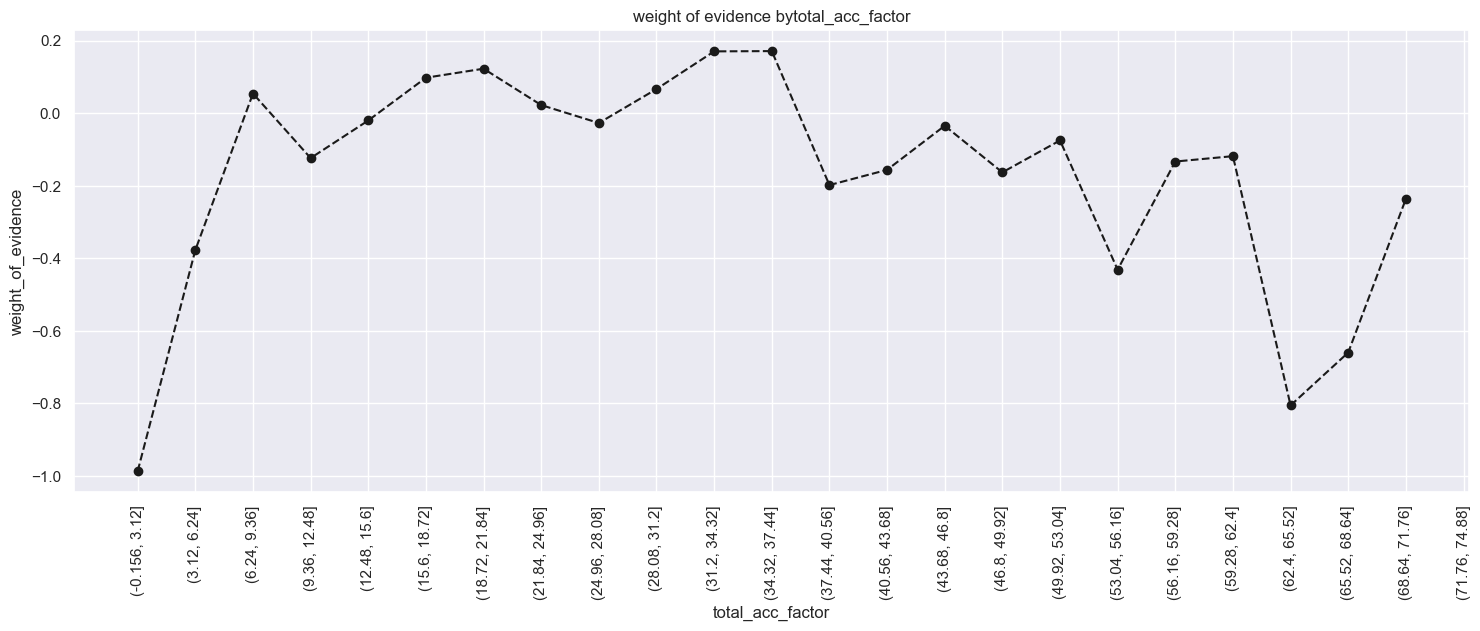

In [298]:
plot_by_woe(df_temp, 90)

In [299]:
df_input_prepr['total_acc:<=27'] = np.where((df_input_prepr['total_acc'] <= 27), 1, 0)
df_input_prepr['total_acc:28-51'] = np.where((df_input_prepr['total_acc'] >= 28) & (df_input_prepr['total_acc'] <= 51), 1, 0)
df_input_prepr['total_acc:>=52'] = np.where((df_input_prepr['total_acc'] >= 52), 1, 0)

In [300]:
df_temp = woe_ordered_continuous(df_input_prepr, 'acc_now_delinq', df_target_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,0.0,92871,0.981663,0.995861,91168.0,1703.0,0.995980,0.989541,0.006486,NaN,NaN,inf
1,1.0,360,0.955556,0.003860,344.0,16.0,0.003758,0.009297,-0.905774,0.026107,0.912260,inf
2,2.0,22,0.909091,0.000236,20.0,2.0,0.000218,0.001162,-1.671242,0.046465,0.765468,inf
3,3.0,4,1.000000,0.000043,4.0,0.0,0.000044,0.000000,inf,0.090909,inf,inf


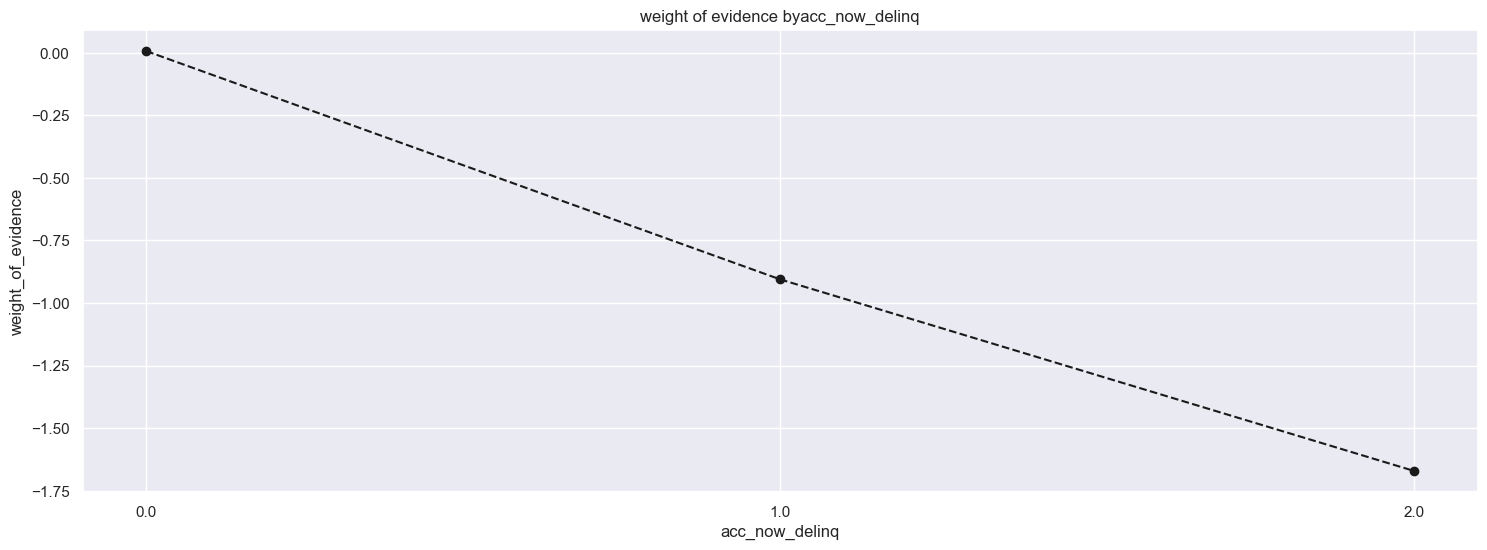

In [301]:
plot_by_woe(df_temp)

In [302]:
df_input_prepr['acc_now_delinq:0'] = np.where((df_input_prepr['acc_now_delinq'] == 0), 1, 0)
df_input_prepr['acc_now_delinq:>=1'] = np.where((df_input_prepr['acc_now_delinq'] >= 1), 1, 0)

In [303]:
df_input_prepr['total_rev_hi_lim_factor'] = pd.cut(df_input_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_input_prepr, 'total_rev_hi_lim_factor', df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
C:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-2013.133, 1006.566]",238,0.983193,0.002552,234.0,4.0,0.002556,0.002324,0.095200,NaN,NaN,inf
1,"(1006.566, 2013.133]",678,0.985251,0.007270,668.0,10.0,0.007298,0.005811,0.227876,0.002057,0.132676,inf
2,"(2013.133, 3019.7]",1121,0.986619,0.012021,1106.0,15.0,0.012083,0.008716,0.326628,0.001368,0.098752,inf
3,"(3019.7, 4026.266]",1461,0.981520,0.015666,1434.0,27.0,0.015666,0.015689,-0.001441,0.005100,0.328069,inf
4,"(4026.266, 5032.832]",2163,0.970411,0.023194,2099.0,64.0,0.022931,0.037188,-0.483494,0.011108,0.482053,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(2008100.168, 2009106.734]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(2009106.734, 2010113.301]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(2010113.301, 2011119.867]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(2011119.867, 2012126.434]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


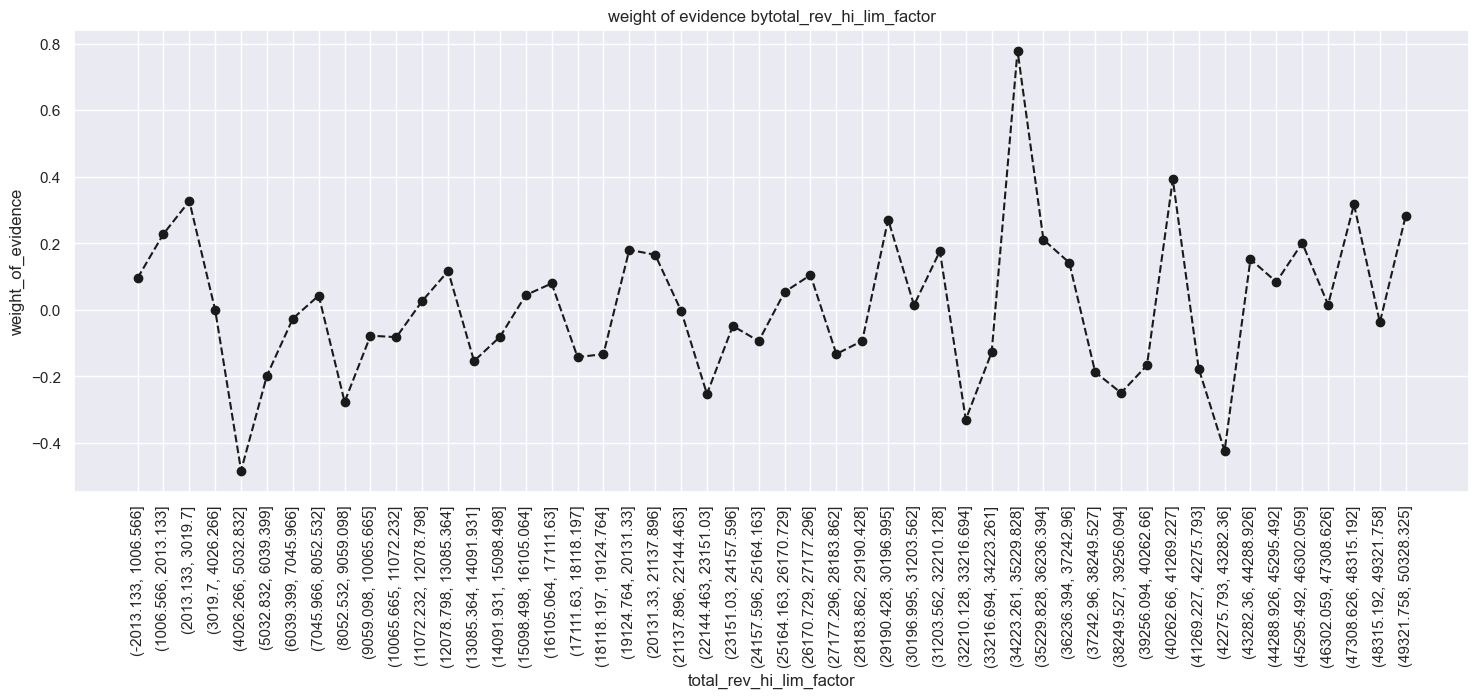

In [304]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [305]:
df_input_prepr['total_rev_hi_lim:<=5K'] = np.where((df_input_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_input_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_input_prepr['total_rev_hi_lim'] > 5000) & (df_input_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_input_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_input_prepr['total_rev_hi_lim'] > 10000) & (df_input_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_input_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_input_prepr['total_rev_hi_lim'] > 20000) & (df_input_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_input_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_input_prepr['total_rev_hi_lim'] > 30000) & (df_input_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_input_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_input_prepr['total_rev_hi_lim'] > 40000) & (df_input_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_input_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_input_prepr['total_rev_hi_lim'] > 55000) & (df_input_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_input_prepr['total_rev_hi_lim:>95K'] = np.where((df_input_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [306]:
df_input_prepr['installment_factor'] = pd.cut(df_input_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_input_prepr, 'installment_factor', df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(14.369, 43.585]",485,0.987629,0.005201,479.0,6.0,0.005233,0.003486,0.406114,NaN,NaN,inf
1,"(43.585, 71.41]",1246,0.991974,0.013361,1236.0,10.0,0.013503,0.005811,0.843224,0.004345,0.437109,inf
2,"(71.41, 99.235]",1731,0.987291,0.018562,1709.0,22.0,0.018670,0.012783,0.378794,0.004684,0.464429,inf
3,"(99.235, 127.06]",2292,0.982984,0.024577,2253.0,39.0,0.024613,0.022661,0.082629,0.004306,0.296165,inf
4,"(127.06, 154.885]",2602,0.981937,0.027901,2555.0,47.0,0.027913,0.027310,0.021833,0.001047,0.060796,inf
5,"(154.885, 182.71]",4133,0.983063,0.044318,4063.0,70.0,0.044387,0.040674,0.087355,0.001126,0.065522,inf
6,"(182.71, 210.535]",4109,0.987832,0.044061,4059.0,50.0,0.044343,0.029053,0.422842,0.004768,0.335487,inf
7,"(210.535, 238.36]",3730,0.986327,0.039997,3679.0,51.0,0.040192,0.029634,0.304744,0.001505,0.118098,inf
8,"(238.36, 266.185]",4660,0.977682,0.049969,4556.0,104.0,0.049773,0.060430,-0.194017,0.008645,0.498761,inf
9,"(266.185, 294.01]",4975,0.979497,0.053347,4873.0,102.0,0.053236,0.059268,-0.107335,0.001815,0.086683,inf


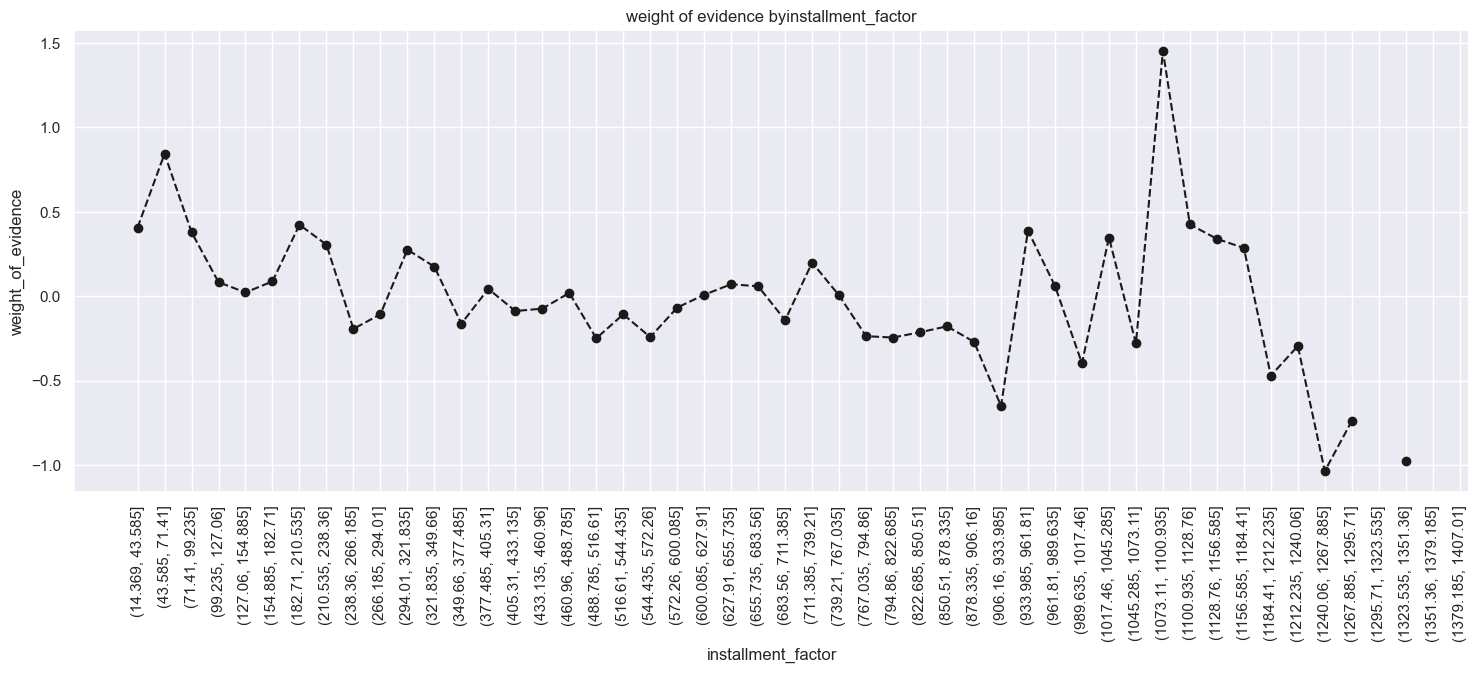

In [307]:
plot_by_woe(df_temp, 90)

In [308]:
df_input_prepr['annual_inc_factor']=pd.cut(df_input_prepr['annual_inc'],50)
df_temp = woe_ordered_continuous(df_input_prepr, 'annual_inc_factor', df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-2695.2, 154704.0]",89203,0.981503,0.956529,87553.0,1650.0,0.956487,0.958745,-0.002358,NaN,NaN,inf
1,"(154704.0, 304608.0]",3626,0.982074,0.038882,3561.0,65.0,0.038903,0.037769,0.029583,0.000571,0.031940,inf
2,"(304608.0, 454512.0]",282,0.985816,0.003024,278.0,4.0,0.003037,0.002324,0.267500,0.003742,0.237917,inf
3,"(454512.0, 604416.0]",86,1.000000,0.000922,86.0,0.0,0.000940,0.000000,inf,0.014184,inf,inf
4,"(604416.0, 754320.0]",23,0.956522,0.000247,22.0,1.0,0.000240,0.000581,-0.882784,0.043478,inf,inf
5,"(754320.0, 904224.0]",18,1.000000,0.000193,18.0,0.0,0.000197,0.000000,inf,0.043478,inf,inf
6,"(904224.0, 1054128.0]",7,1.000000,0.000075,7.0,0.0,0.000076,0.000000,inf,0.000000,NaN,inf
7,"(1054128.0, 1204032.0]",6,1.000000,0.000064,6.0,0.0,0.000066,0.000000,inf,0.000000,NaN,inf
8,"(1204032.0, 1353936.0]",2,0.500000,0.000021,1.0,1.0,0.000011,0.000581,-3.973827,0.500000,inf,inf
9,"(1353936.0, 1503840.0]",2,1.000000,0.000021,2.0,0.0,0.000022,0.000000,inf,0.500000,inf,inf


In [309]:
df_input_prepr['annual_inc_factor']=pd.cut(df_input_prepr['annual_inc'],100)
df_temp = woe_ordered_continuous(df_input_prepr, 'annual_inc_factor', df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-2695.2, 79752.0]",62621,0.980566,0.671488,61404.0,1217.0,0.670818,0.707147,-0.052741,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.983711,0.285040,26149.0,433.0,0.285669,0.251598,0.127002,0.003145,0.179742,inf
2,"(154704.0, 229656.0]",2916,0.982510,0.031268,2865.0,51.0,0.031299,0.029634,0.054671,0.001200,0.072331,inf
3,"(229656.0, 304608.0]",710,0.980282,0.007613,696.0,14.0,0.007604,0.008135,-0.067534,0.002229,0.122206,inf
4,"(304608.0, 379560.0]",171,0.988304,0.001834,169.0,2.0,0.001846,0.001162,0.462925,0.008022,0.530459,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(7125240.0, 7200192.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(7200192.0, 7275144.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(7275144.0, 7350096.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(7350096.0, 7425048.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [310]:
df_input_prepr_temp=df_input_prepr.loc[df_input_prepr['annual_inc']<=140000,:]

In [311]:
df_input_prepr_temp['annual_inc_factor']=pd.cut(df_input_prepr_temp['annual_inc'],50)
df_temp = woe_ordered_continuous(df_input_prepr_temp, 'annual_inc_factor', df_target_prepr[df_input_prepr_temp.index])
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\1888408674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_prepr_temp['annual_inc_factor']=pd.cut(df_input_prepr_temp['annual_inc'],50)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000116,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",84,0.964286,0.000958,81.0,3.0,0.000941,0.001847,-0.674397,0.035714,inf,inf
2,"(10208.0, 12912.0]",123,0.959350,0.001403,118.0,5.0,0.001371,0.003079,-0.808987,0.004936,0.134590,inf
3,"(12912.0, 15616.0]",304,0.973684,0.003467,296.0,8.0,0.003439,0.004926,-0.359316,0.014335,0.449671,inf
4,"(15616.0, 18320.0]",383,0.981723,0.004368,376.0,7.0,0.004369,0.004310,0.013445,0.008039,0.372761,inf
5,"(18320.0, 21024.0]",733,0.969986,0.008359,711.0,22.0,0.008261,0.013547,-0.494604,0.011737,0.508049,inf
6,"(21024.0, 23728.0]",704,0.971591,0.008028,684.0,20.0,0.007947,0.012315,-0.438008,0.001605,0.056596,inf
7,"(23728.0, 26432.0]",1785,0.982073,0.020356,1753.0,32.0,0.020368,0.019704,0.033114,0.010482,0.471122,inf
8,"(26432.0, 29136.0]",1355,0.983764,0.015452,1333.0,22.0,0.015488,0.013547,0.133911,0.001691,0.100797,inf
9,"(29136.0, 31840.0]",2292,0.979930,0.026137,2246.0,46.0,0.026096,0.028325,-0.081969,0.003834,0.215880,inf


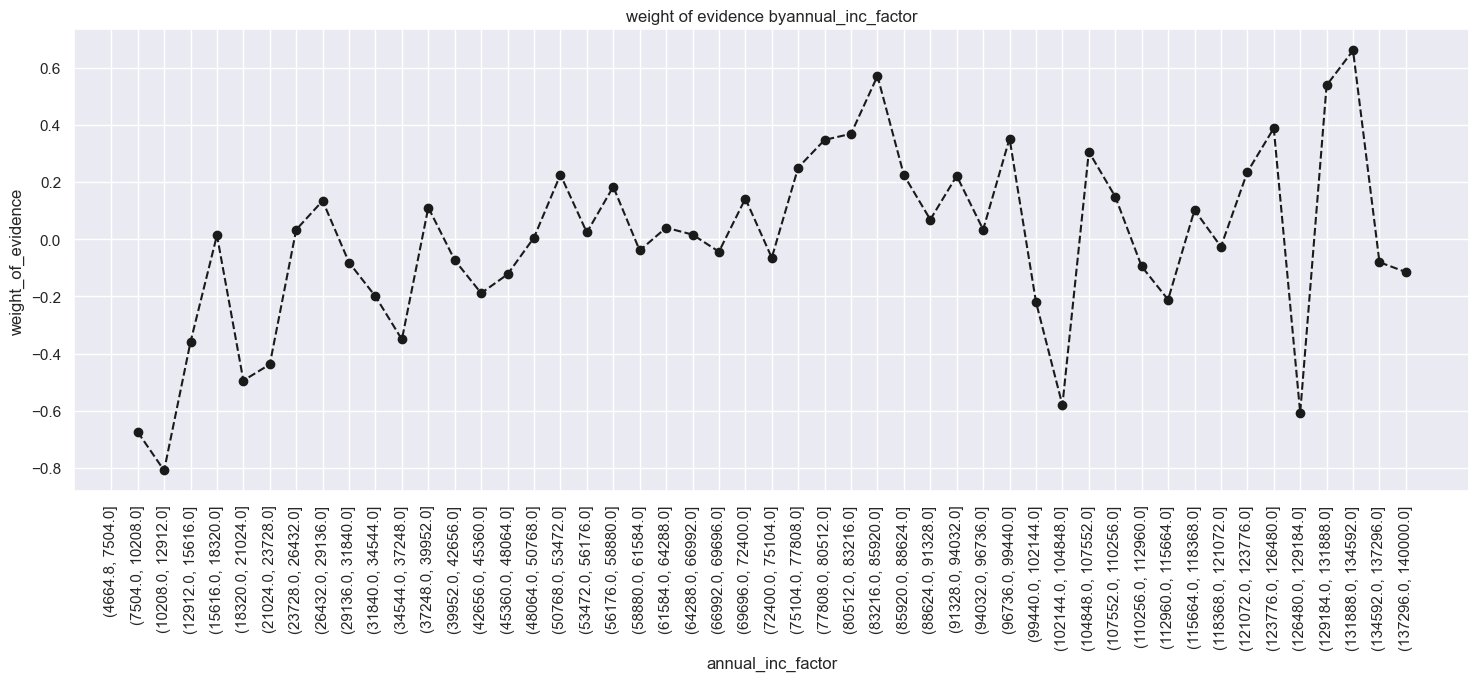

In [312]:
plot_by_woe(df_temp, 90)

In [313]:
df_input_prepr['annual_inc:<20k']=np.where((df_input_prepr['annual_inc']<=20000),1,0)
df_input_prepr['annual_inc:20k-30k']=np.where((df_input_prepr['annual_inc']> 20000) &(df_input_prepr['annual_inc']<= 30000 ),1,0)
df_input_prepr['annual_inc:30k-40k']=np.where((df_input_prepr['annual_inc']> 30000) &(df_input_prepr['annual_inc']<= 40000 ),1,0)
df_input_prepr['annual_inc:40k-50k']=np.where((df_input_prepr['annual_inc']> 40000) &(df_input_prepr['annual_inc']<= 50000 ),1,0)
df_input_prepr['annual_inc:50k-60k']=np.where((df_input_prepr['annual_inc']> 50000) &(df_input_prepr['annual_inc']<= 60000 ),1,0)
df_input_prepr['annual_inc:60k-70k']=np.where((df_input_prepr['annual_inc']> 60000) &(df_input_prepr['annual_inc']<= 70000 ),1,0)
df_input_prepr['annual_inc:70k-80k']=np.where((df_input_prepr['annual_inc']> 70000) &(df_input_prepr['annual_inc']<= 80000 ),1,0)
df_input_prepr['annual_inc:80k-90k']=np.where((df_input_prepr['annual_inc']> 80000) &(df_input_prepr['annual_inc']<= 90000 ),1,0)
df_input_prepr['annual_inc:90k-100k']=np.where((df_input_prepr['annual_inc']> 90000) &(df_input_prepr['annual_inc']<= 100000 ),1,0)
df_input_prepr['annual_inc:100k-120k']=np.where((df_input_prepr['annual_inc']> 100000) &(df_input_prepr['annual_inc']<= 120000 ),1,0)
df_input_prepr['annual_inc:120k-140k']=np.where((df_input_prepr['annual_inc']> 120000) &(df_input_prepr['annual_inc']<= 140000 ),1,0)
df_input_prepr['annual_inc:>140k']=np.where((df_input_prepr['annual_inc']> 140000),1,0)

In [314]:
df_input_prepr_temp=df_input_prepr[pd.notnull(df_input_prepr['mths_since_last_delinq'])]
df_input_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_input_prepr_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_input_prepr_temp, 'mths_since_last_delinq_factor', df_target_prepr[df_input_prepr_temp.index])
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3151658131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_input_prepr_temp['mths_since_last_delinq'],50)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecate

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.17, 3.4]",1348,0.956973,0.031283,1290.0,58.0,0.030569,0.065022,-0.754731,NaN,NaN,inf
1,"(3.4, 6.8]",1890,0.971429,0.043861,1836.0,54.0,0.043508,0.060538,-0.330325,0.014455,0.424406,inf
2,"(6.8, 10.2]",3373,0.975986,0.078276,3292.0,81.0,0.078011,0.090807,-0.151884,0.004557,0.178441,inf
3,"(10.2, 13.6]",2496,0.978766,0.057924,2443.0,53.0,0.057892,0.059417,-0.025996,0.002780,0.125889,inf
4,"(13.6, 17.0]",3165,0.973144,0.073449,3080.0,85.0,0.072988,0.095291,-0.266652,0.005622,0.240657,inf
5,"(17.0, 20.4]",2282,0.978966,0.052958,2234.0,48.0,0.052940,0.053812,-0.016338,0.005822,0.250314,inf
6,"(20.4, 23.8]",2115,0.982979,0.049082,2079.0,36.0,0.049267,0.040359,0.199438,0.004013,0.215775,inf
7,"(23.8, 27.2]",2755,0.984029,0.063934,2711.0,44.0,0.064243,0.049327,0.264198,0.001050,0.064760,inf
8,"(27.2, 30.6]",1929,0.984966,0.044766,1900.0,29.0,0.045025,0.032511,0.325628,0.000937,0.061430,inf
9,"(30.6, 34.0]",2453,0.978801,0.056926,2401.0,52.0,0.056897,0.058296,-0.024289,0.006165,0.349916,inf


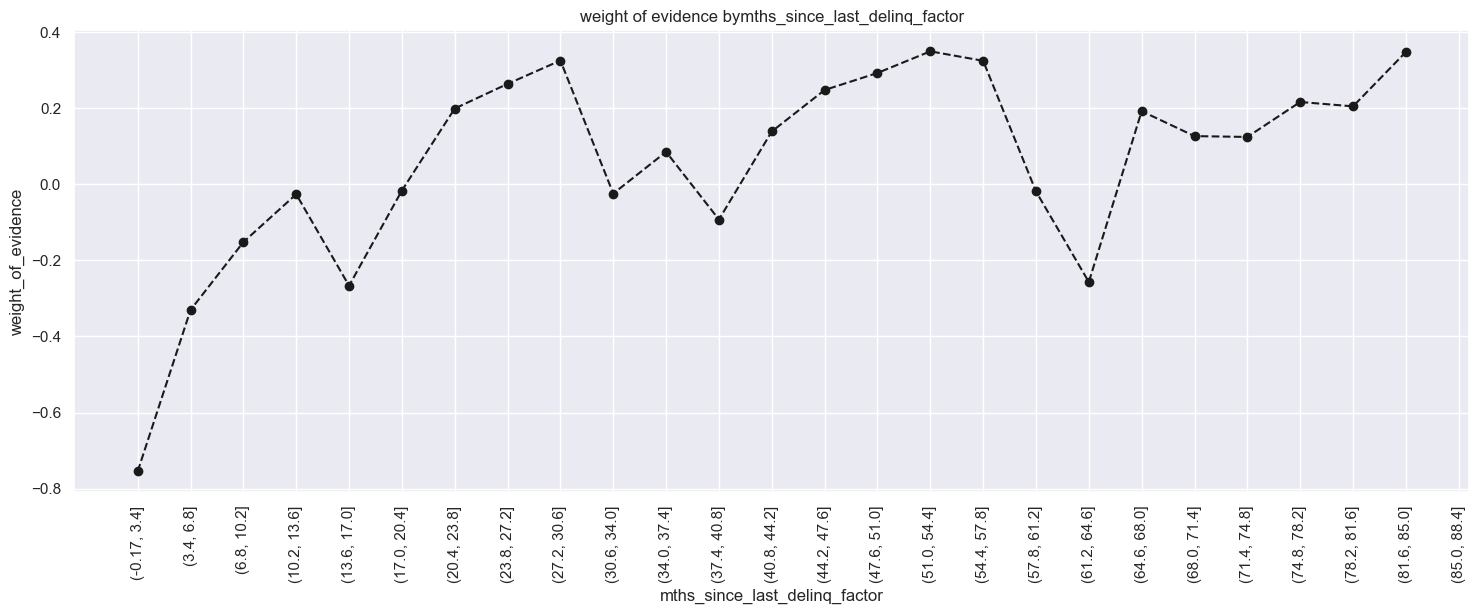

In [315]:
plot_by_woe(df_temp, 90)

In [316]:
df_input_prepr['mths_since_last_delinq:Missing']=np.where((df_input_prepr['mths_since_last_delinq'].isnull()),1,0)
df_input_prepr['mths_since_last_delinq:0-3']=np.where((df_input_prepr['mths_since_last_delinq']>=0 ) & (df_input_prepr['mths_since_last_delinq']<=3),1,0)
df_input_prepr['mths_since_last_delinq:4-30']=np.where((df_input_prepr['mths_since_last_delinq']>=4 ) & (df_input_prepr['mths_since_last_delinq']<=30),1,0)
df_input_prepr['mths_since_last_delinq:31-56']=np.where((df_input_prepr['mths_since_last_delinq']>=31 ) & (df_input_prepr['mths_since_last_delinq']<=56),1,0)
df_input_prepr['mths_since_last_delinq:>=57']=np.where((df_input_prepr['mths_since_last_delinq']>=57 ),1,0)


C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3577298057.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr['mths_since_last_delinq:31-56']=np.where((df_input_prepr['mths_since_last_delinq']>=31 ) & (df_input_prepr['mths_since_last_delinq']<=56),1,0)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3577298057.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr['mths_since_last_delinq:>=57']=np.where((df_input_prepr['mths_since_last_delinq']>=57 ),1,0)


In [317]:
df_input_prepr['dti_factor'] = pd.cut(df_input_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_input_prepr, 'dti_factor', df_target_prepr)
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3784453313.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr['dti_factor'] = pd.cut(df_input_prepr['dti'], 100)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.04, 0.4]",187,0.957219,0.002005,179.0,8.0,0.001956,0.004648,-0.865883,NaN,NaN,inf
1,"(0.4, 0.8]",184,0.989130,0.001973,182.0,2.0,0.001988,0.001162,0.537033,0.031911,1.402915,inf
2,"(0.8, 1.2]",223,0.986547,0.002391,220.0,3.0,0.002403,0.001743,0.321188,0.002583,0.215844,inf
3,"(1.2, 1.6]",255,0.984314,0.002734,251.0,4.0,0.002742,0.002324,0.165332,0.002233,0.155857,inf
4,"(1.6, 2.0]",315,0.980952,0.003378,309.0,6.0,0.003376,0.003486,-0.032245,0.003361,0.197577,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",54,0.981481,0.000579,53.0,1.0,0.000579,0.000581,-0.003535,0.025926,0.902239,inf
96,"(38.39, 38.79]",37,1.000000,0.000397,37.0,0.0,0.000404,0.000000,inf,0.018519,inf,inf
97,"(38.79, 39.19]",45,0.955556,0.000483,43.0,2.0,0.000470,0.001162,-0.905774,0.044444,inf,inf
98,"(39.19, 39.59]",44,1.000000,0.000472,44.0,0.0,0.000481,0.000000,inf,0.044444,inf,inf


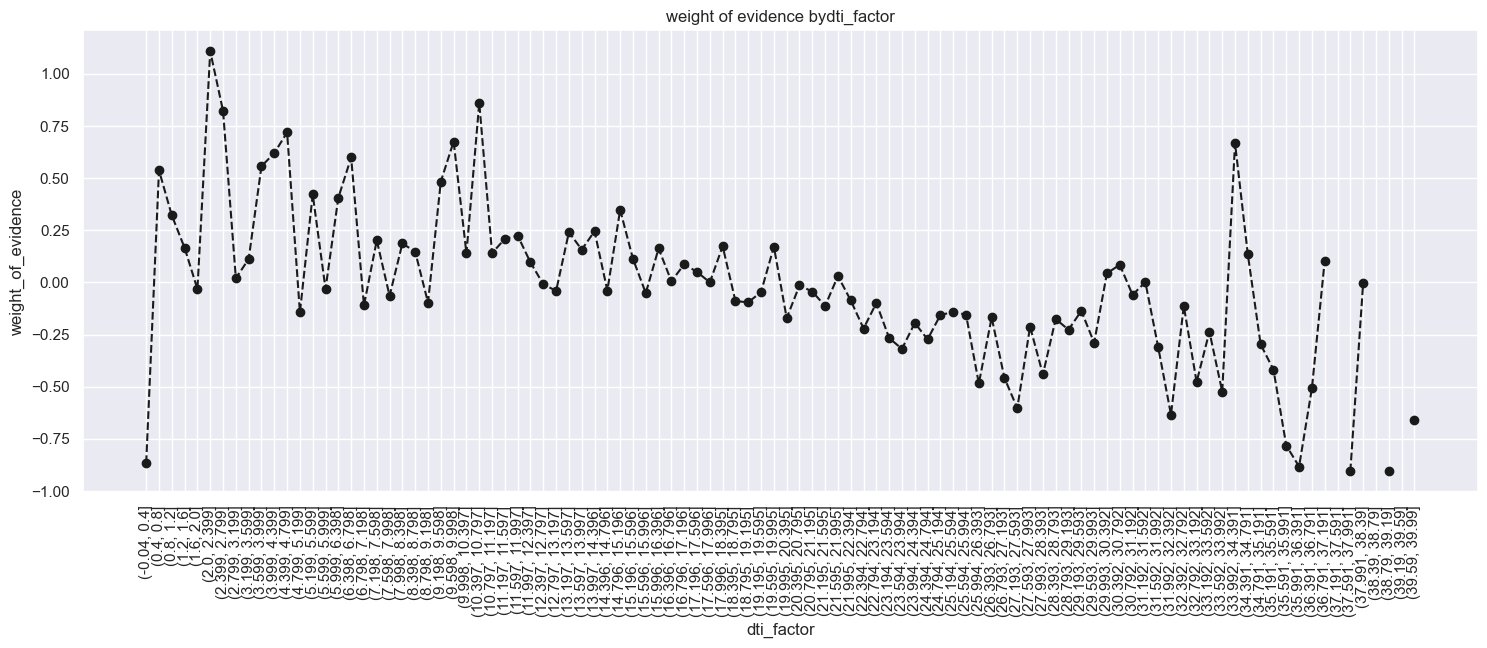

In [318]:
plot_by_woe(df_temp, 90)

In [319]:
df_input_prepr_temp = df_input_prepr.loc[df_input_prepr['dti'] <= 35, : ]

In [320]:
df_input_prepr_temp['dti_factor'] = pd.cut(df_input_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_input_prepr_temp, 'dti_factor', df_target_prepr[df_input_prepr_temp.index])
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\180978668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_prepr_temp['dti_factor'] = pd.cut(df_input_prepr_temp['dti'], 50)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3043867629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.035, 0.7]",328,0.972561,0.003544,319.0,9.0,0.003511,0.005288,-0.409395,NaN,NaN,0.056265
1,"(0.7, 1.4]",393,0.979644,0.004246,385.0,8.0,0.004238,0.004700,-0.103560,0.007083,0.305835,0.056265
2,"(1.4, 2.1]",536,0.988806,0.005792,530.0,6.0,0.005834,0.003525,0.503756,0.009162,0.607316,0.056265
3,"(2.1, 2.8]",607,0.991763,0.006559,602.0,5.0,0.006627,0.002938,0.813458,0.002957,0.309702,0.056265
4,"(2.8, 3.5]",811,0.981504,0.008763,796.0,15.0,0.008762,0.008813,-0.005813,0.010258,0.819271,0.056265
5,"(3.5, 4.2]",970,0.987629,0.010481,958.0,12.0,0.010545,0.007051,0.402579,0.006125,0.408392,0.056265
6,"(4.2, 4.9]",1140,0.991228,0.012318,1130.0,10.0,0.012439,0.005875,0.750026,0.003599,0.347447,0.056265
7,"(4.9, 5.6]",1370,0.983942,0.014803,1348.0,22.0,0.014838,0.012926,0.137973,0.007286,0.612053,0.056265
8,"(5.6, 6.3]",1491,0.983233,0.016111,1466.0,25.0,0.016137,0.014689,0.094055,0.000709,0.043918,0.056265
9,"(6.3, 7.0]",1722,0.988966,0.018607,1703.0,19.0,0.018746,0.011163,0.518346,0.005734,0.424291,0.056265


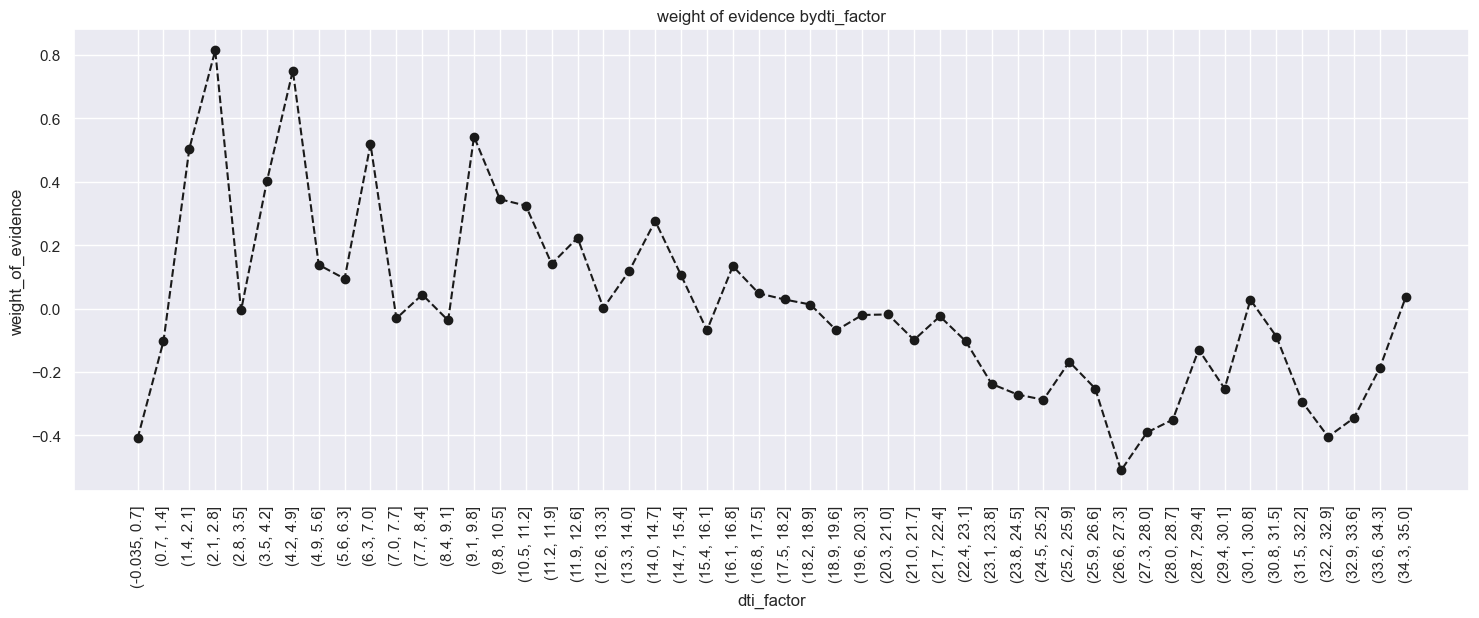

In [321]:
plot_by_woe(df_temp, 90)

In [322]:
df_input_prepr['dti:<=1.4'] = np.where((df_input_prepr['dti'] <= 1.4), 1, 0)
df_input_prepr['dti:1.4-3.5'] = np.where((df_input_prepr['dti'] > 1.4) & (df_input_prepr['dti'] <= 3.5), 1, 0)
df_input_prepr['dti:3.5-7.7'] = np.where((df_input_prepr['dti'] > 3.5) & (df_input_prepr['dti'] <= 7.7), 1, 0)
df_input_prepr['dti:7.7-10.5'] = np.where((df_input_prepr['dti'] > 7.7) & (df_input_prepr['dti'] <= 10.5), 1, 0)
df_input_prepr['dti:10.5-16.1'] = np.where((df_input_prepr['dti'] > 10.5) & (df_input_prepr['dti'] <= 16.1), 1, 0)
df_input_prepr['dti:16.1-20.3'] = np.where((df_input_prepr['dti'] > 16.1) & (df_input_prepr['dti'] <= 20.3), 1, 0)
df_input_prepr['dti:20.3-21.7'] = np.where((df_input_prepr['dti'] > 20.3) & (df_input_prepr['dti'] <= 21.7), 1, 0)
df_input_prepr['dti:21.7-22.4'] = np.where((df_input_prepr['dti'] > 21.7) & (df_input_prepr['dti'] <= 22.4), 1, 0)
df_input_prepr['dti:22.4-35'] = np.where((df_input_prepr['dti'] > 22.4) & (df_input_prepr['dti'] <= 35), 1, 0)
df_input_prepr['dti:>35'] = np.where((df_input_prepr['dti'] > 35), 1, 0)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\2790790094.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr['dti:<=1.4'] = np.where((df_input_prepr['dti'] <= 1.4), 1, 0)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\2790790094.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr['dti:1.4-3.5'] = np.where((df_input_prepr['dti'] > 1.4) & (df_input_prepr['dti'] <= 3.5), 1, 0)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\2790790094.py:3: PerformanceWarning: DataFrame

In [323]:
df_input_prepr_temp = df_input_prepr[pd.notnull(df_input_prepr['mths_since_last_record'])]
df_input_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_input_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_input_prepr_temp, 'mths_since_last_record_factor', df_target_prepr[df_input_prepr_temp.index])
df_temp

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\2766215478.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_input_prepr_temp['mths_since_last_record'], 50)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\2766215478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_input_prepr_temp['mths_since_last_record'], 50)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_110

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.129, 2.58]",244,0.860656,0.019410,210.0,34.0,0.017098,0.117647,-1.928716,NaN,NaN,inf
1,"(2.58, 5.16]",36,0.944444,0.002864,34.0,2.0,0.002768,0.006920,-0.916250,0.083789,1.012466,inf
2,"(5.16, 7.74]",39,0.948718,0.003102,37.0,2.0,0.003013,0.006920,-0.831693,0.004274,0.084557,inf
3,"(7.74, 10.32]",66,1.000000,0.005250,66.0,0.0,0.005374,0.000000,inf,0.051282,inf,inf
4,"(10.32, 12.9]",42,0.928571,0.003341,39.0,3.0,0.003175,0.010381,-1.184514,0.071429,inf,inf
5,"(12.9, 15.48]",69,0.956522,0.005489,66.0,3.0,0.005374,0.010381,-0.658421,0.027950,0.526093,inf
6,"(15.48, 18.06]",95,0.978947,0.007557,93.0,2.0,0.007572,0.006920,0.089989,0.022426,0.748410,inf
7,"(18.06, 20.64]",58,0.982759,0.004614,57.0,1.0,0.004641,0.003460,0.293588,0.003811,0.203599,inf
8,"(20.64, 23.22]",101,0.980198,0.008034,99.0,2.0,0.008061,0.006920,0.152509,0.002561,0.141079,inf
9,"(23.22, 25.8]",94,0.978723,0.007478,92.0,2.0,0.007491,0.006920,0.079178,0.001475,0.073331,inf


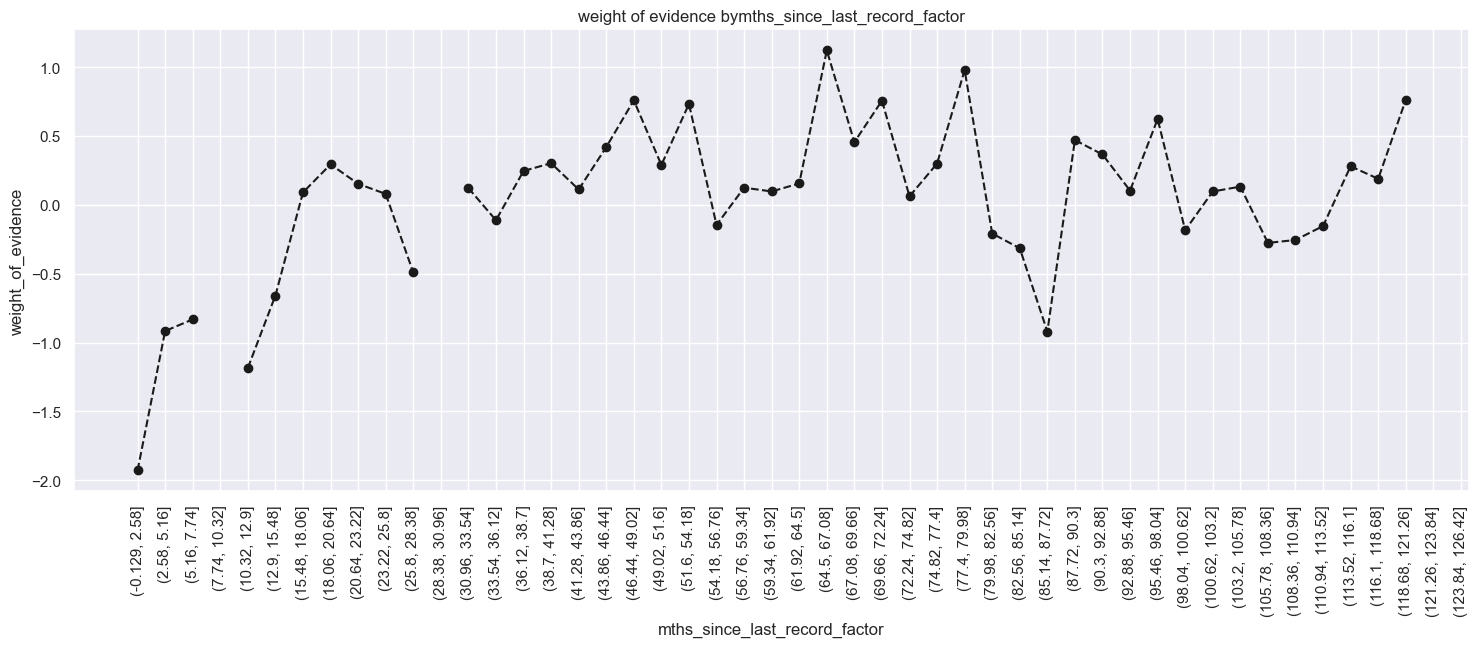

In [324]:
plot_by_woe(df_temp, 90)

In [325]:
df_input_prepr['mths_since_last_record:Missing'] = np.where((df_input_prepr['mths_since_last_record'].isnull()), 1, 0)
df_input_prepr['mths_since_last_record:0-2'] = np.where((df_input_prepr['mths_since_last_record'] >= 0) & (df_input_prepr['mths_since_last_record'] <= 2), 1, 0)
df_input_prepr['mths_since_last_record:3-20'] = np.where((df_input_prepr['mths_since_last_record'] >= 3) & (df_input_prepr['mths_since_last_record'] <= 20), 1, 0)
df_input_prepr['mths_since_last_record:21-31'] = np.where((df_input_prepr['mths_since_last_record'] >= 21) & (df_input_prepr['mths_since_last_record'] <= 31), 1, 0)
df_input_prepr['mths_since_last_record:32-80'] = np.where((df_input_prepr['mths_since_last_record'] >= 32) & (df_input_prepr['mths_since_last_record'] <= 80), 1, 0)
df_input_prepr['mths_since_last_record:81-86'] = np.where((df_input_prepr['mths_since_last_record'] >= 81) & (df_input_prepr['mths_since_last_record'] <= 86), 1, 0)
df_input_prepr['mths_since_last_record:>=86'] = np.where((df_input_prepr['mths_since_last_record'] >= 86), 1, 0)

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3629720434.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr['mths_since_last_record:Missing'] = np.where((df_input_prepr['mths_since_last_record'].isnull()), 1, 0)
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3629720434.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input_prepr['mths_since_last_record:0-2'] = np.where((df_input_prepr['mths_since_last_record'] >= 0) & (df_input_prepr['mths_since_last_record'] <= 2), 1, 0)
C:\Users\sat

In [166]:
#df_input_train = df_input_prepr
df_input_test=df_input_prepr

In [327]:
df_target_test.shape

(93257,)

In [ ]:
df_input_train.to_csv('loan_data_inputs_train.csv')
df_target_train.to_csv('loan_data_targets_train.csv')

In [328]:

df_input_test.to_csv('loan_data_inputs_test.csv')
df_target_test.to_csv('loan_data_targets_test.csv')

### Loading dataset and selecting features

In [329]:
loan_data_input_train=pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_target_train=pd.read_csv('loan_data_targets_train.csv',index_col=0,header=None)
loan_data_input_test=pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_target_test=pd.read_csv('loan_data_targets_test.csv',index_col=0,header=None)

In [330]:
loan_data_input_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [331]:
loan_data_target_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,1


In [332]:
loan_data_input_train.shape

(373028, 330)

In [333]:
loan_data_target_train.shape

(373028, 1)

In [334]:
loan_data_input_test.shape

(93257, 330)

In [335]:
loan_data_target_test.shape

(93257, 1)

#### selecting features

In [336]:
input_train_with_ref_cat=loan_data_input_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4-5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'mnth_since_issue_date:<46',
'mnth_since_issue_date:46-57',
'mnth_since_issue_date:57-62',
'mnth_since_issue_date:62-67',
'mnth_since_issue_date:67-73',
'mnth_since_issue_date:73-78',
'mnth_since_issue_date:78-86',
'mnth_since_issue_date:86-102',
'mnth_since_issue_date:102-111',
'mnth_since_issue_date:>111',
'int_rate_factor:<9.548',
'int_rate_factor:9.548-12.025',
'int_rate_factor:12.025-15.74',
'int_rate_factor:15.74-20.281',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'mnth_since_earliest_cr_line_date:141-164',
'mnth_since_earliest_cr_line_date:165-247',
'mnth_since_earliest_cr_line_date:248-270',
'mnth_since_earliest_cr_line_date:271-352',
'mnth_since_earliest_cr_line_date:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'initial_list_status:f',
'initial_list_status:w']]
                                                
                                                       


In [337]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mnth_since_issue_date:>111',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20k',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [338]:
input_train = input_train_with_ref_cat.drop(ref_categories, axis = 1)
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,verification_status:Not Verified,verification_status:Source Verified,initial_list_status:w
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## PD Model Estimation

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [340]:
reg = LogisticRegression()

In [341]:
input_train.shape

(373028, 102)

In [342]:
reg.fit(input_train, loan_data_target_train)

C:\Users\satyaki basak\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [343]:
reg.intercept_

array([-0.3411323])

In [344]:
reg.coef_

array([[ 1.41504208e+00,  9.32725106e-01,  6.95876937e-01,
         3.76174242e-01,  4.90193817e-03, -2.37561215e-01,
         7.07877253e-02,  1.43751581e-01, -1.17170794e-02,
        -4.22281811e-02,  2.11421308e-02,  6.07484203e-02,
        -1.15393763e-02,  1.52891493e-01,  3.51656969e-02,
         1.91332609e-01,  1.98364363e-01,  4.65200232e-01,
         8.17834365e-02,  2.01485267e-02,  1.01933097e-01,
        -5.73184433e-03, -5.73184433e-03, -5.73184433e-03,
        -5.73184433e-03, -5.73184433e-03, -5.73184433e-03,
        -5.73184433e-03, -5.73184433e-03, -5.73184433e-03,
         4.35745266e-01,  7.79725383e-01,  1.03175472e+00,
         1.79058070e+00,  2.43126402e+00,  2.22816489e+00,
         2.25370622e+00,  6.52517414e-01, -6.14086887e-02,
         5.67064462e-02, -1.63396444e-01, -3.83022762e-01,
        -2.86925005e-01, -9.11028666e-02, -1.05766010e-02,
        -7.14931791e-02, -4.51325262e-02, -9.95282090e-03,
         1.71041325e+00,  1.64703752e+00,  1.20083306e+0

In [345]:
feature_name = input_train.columns.values

In [346]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.341132
1,grade:A,1.415042
2,grade:B,0.932725
3,grade:C,0.695877
4,grade:D,0.376174
...,...,...
98,mths_since_last_record:81-86,0.656141
99,mths_since_last_record:>=86,0.771503
100,verification_status:Not Verified,0.070758
101,verification_status:Source Verified,-0.039786


In [455]:
input_train_with_ref_cat=loan_data_input_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4-5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'mnth_since_issue_date:<46',
'mnth_since_issue_date:46-57',
'mnth_since_issue_date:57-62',
'mnth_since_issue_date:62-67',
'mnth_since_issue_date:67-73',
'mnth_since_issue_date:73-78',
'mnth_since_issue_date:78-86',
'mnth_since_issue_date:86-102',
'mnth_since_issue_date:102-111',
'mnth_since_issue_date:>111',
'int_rate_factor:<9.548',
'int_rate_factor:9.548-12.025',
'int_rate_factor:12.025-15.74',
'int_rate_factor:15.74-20.281',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'mnth_since_earliest_cr_line_date:141-164',
'mnth_since_earliest_cr_line_date:165-247',
'mnth_since_earliest_cr_line_date:248-270',
'mnth_since_earliest_cr_line_date:271-352',
'mnth_since_earliest_cr_line_date:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'initial_list_status:f',
'initial_list_status:w']]
                                                
                                                       


In [456]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mnth_since_issue_date:>111',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20k',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [457]:
input_train = input_train_with_ref_cat.drop(ref_categories, axis = 1)
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,verification_status:Not Verified,verification_status:Source Verified,initial_list_status:w
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [458]:
model=reg.fit(input_train, loan_data_target_train)

C:\Users\satyaki basak\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [459]:
reg.intercept_

array([-0.82351055])

In [460]:
reg.coef_

array([[ 1.62680488e+00,  9.58127575e-01,  7.45677340e-01,
         4.53143218e-01,  1.28204600e-01, -1.03438794e-01,
         1.48910641e-01,  1.66800602e-01, -2.99011622e-02,
        -4.46802281e-02,  6.39053780e-02,  4.74935713e-02,
        -2.80875285e-02,  1.49126112e-01,  5.35910874e-02,
         1.98251732e-01,  2.29858794e-01,  3.92588249e-01,
         1.13056321e-01,  1.04495616e-01,  8.60918247e-02,
        -5.79627762e-03, -5.79627762e-03, -5.79627762e-03,
        -5.79627762e-03, -5.79627762e-03, -5.79627762e-03,
        -5.79627762e-03, -5.79627762e-03, -5.79627762e-03,
         6.79686644e-01,  1.03391775e+00,  1.33806636e+00,
         2.09474744e+00,  2.50463913e+00,  2.47639883e+00,
         2.45755336e+00,  7.33000579e-01,  4.18363567e-01,
        -1.45912820e-02, -1.19997588e-02, -3.00973575e-01,
        -2.21880974e-01, -1.16206338e-02,  1.29744908e-01,
         1.21053525e-01,  1.33604035e-01,  1.99421462e-01,
         1.92315246e+00,  1.85079143e+00,  1.39094511e+0

In [461]:
feature_name = input_train.columns.values

In [462]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.823511
1,grade:A,1.626805
2,grade:B,0.958128
3,grade:C,0.745677
4,grade:D,0.453143
...,...,...
81,mths_since_last_record:81-86,0.678983
82,mths_since_last_record:>=86,0.785326
83,verification_status:Not Verified,0.088031
84,verification_status:Source Verified,-0.026083


In [463]:
import pickle

In [464]:
pickle.dump(reg, open('pd_model.sav', 'wb'))

#### Model validation

In [354]:
input_test_with_ref_cat=loan_data_input_test.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4-5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'mnth_since_issue_date:<46',
'mnth_since_issue_date:46-57',
'mnth_since_issue_date:57-62',
'mnth_since_issue_date:62-67',
'mnth_since_issue_date:67-73',
'mnth_since_issue_date:73-78',
'mnth_since_issue_date:78-86',
'mnth_since_issue_date:86-102',
'mnth_since_issue_date:102-111',
'mnth_since_issue_date:>111',
'int_rate_factor:<9.548',
'int_rate_factor:9.548-12.025',
'int_rate_factor:12.025-15.74',
'int_rate_factor:15.74-20.281',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'mnth_since_earliest_cr_line_date:141-164',
'mnth_since_earliest_cr_line_date:165-247',
'mnth_since_earliest_cr_line_date:248-270',
'mnth_since_earliest_cr_line_date:271-352',
'mnth_since_earliest_cr_line_date:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'initial_list_status:f',
'initial_list_status:w']]
                                                
                              

In [355]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mnth_since_issue_date:>111',
'int_rate_factor:>20.281',
'mnth_since_earliest_cr_line_date:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20k',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [362]:
input_test = input_test_with_ref_cat.drop(ref_categories, axis = 1)
input_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,verification_status:Not Verified,verification_status:Source Verified,initial_list_status:w
362514,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
213591,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
165001,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [365]:
y_hat_test=model.predict(input_test)

In [366]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [367]:
y_hat_test_proba=model.predict_proba(input_test)

In [368]:
y_hat_test_proba

array([[0.01858272, 0.98141728],
       [0.05268739, 0.94731261],
       [0.00308686, 0.99691314],
       ...,
       [0.00438536, 0.99561464],
       [0.00436752, 0.99563248],
       [0.00353576, 0.99646424]])

In [369]:
y_hat_test_proba[: ][:, 1]

array([0.98141728, 0.94731261, 0.99691314, ..., 0.99561464, 0.99563248,
       0.99646424])

In [370]:
y_hat_test_proba=y_hat_test_proba[: ][:, 1]

In [371]:
y_hat_test_proba

array([0.98141728, 0.94731261, 0.99691314, ..., 0.99561464, 0.99563248,
       0.99646424])

In [372]:
loan_data_target_test_temp=loan_data_target_test

In [373]:
loan_data_target_test_temp.reset_index(drop= True, inplace= True)

In [374]:
df_actual_predicted_probs= pd.concat([loan_data_target_test_temp, pd.DataFrame(y_hat_test_proba)],axis=1)

In [375]:
df_actual_predicted_probs.shape

(93257, 2)

In [376]:
df_actual_predicted_probs.columns=['loan_data_target_test','y_hat_test_proba']

In [377]:
df_actual_predicted_probs.index=loan_data_input_test.index

In [378]:
df_actual_predicted_probs.head()

,loan_data_target_test,y_hat_test_proba
362514,1,0.981417
288564,1,0.947313
213591,1,0.996913
263083,1,0.974107
165001,1,0.997420


#### Accuracy and AUC

In [379]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [380]:
cm = confusion_matrix(loan_data_target_test, y_hat_test)
print(cm)

[[    2  1719]
 [    7 91529]]


In [393]:
tr=0.5
df_actual_predicted_probs['y_hat_test']=np.where(df_actual_predicted_probs['y_hat_test_proba']> tr,1,0)

In [394]:
pd.crosstab(df_actual_predicted_probs['loan_data_target_test'],df_actual_predicted_probs['y_hat_test'],rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,2,1719
1,7,91529


In [395]:
pd.crosstab(df_actual_predicted_probs['loan_data_target_test'],df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000021,0.018433
1,0.000075,0.981471


In [396]:
(pd.crosstab(df_actual_predicted_probs['loan_data_target_test'],df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]+(pd.crosstab(df_actual_predicted_probs['loan_data_target_test'],df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.9814920059620189

In [397]:
from sklearn.metrics import roc_curve,roc_auc_score

In [398]:
roc_curve(df_actual_predicted_probs['loan_data_target_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99941894, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.09246635e-05, 2.53452194e-03, ...,
        9.99956301e-01, 9.99956301e-01, 1.00000000e+00]),
 array([       inf, 0.99945552, 0.99920303, ..., 0.37489282, 0.35366231,
        0.2885856 ]))

In [399]:
fpr,tpr,thresholds=roc_curve(df_actual_predicted_probs['loan_data_target_test'],df_actual_predicted_probs['y_hat_test_proba'])

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

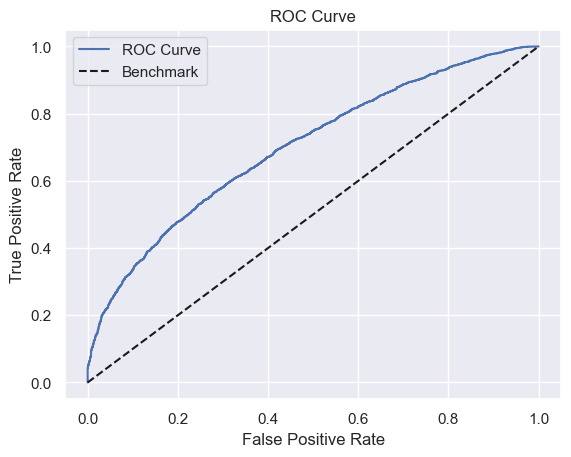

In [404]:
plt.plot(fpr, tpr, label='ROC Curve')  # Your model
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Benchmark') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [405]:
AUROC=roc_auc_score(df_actual_predicted_probs['loan_data_target_test'],df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7001687247945604

#### Gini and Kolmogorov-Smirnov

In [406]:
df_actual_predicted_probs=df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [407]:
df_actual_predicted_probs.head()

,loan_data_target_test,y_hat_test_proba,y_hat_test
42344,1,0.288586,0
42341,1,0.305260,0
41948,1,0.333358,0
42404,1,0.340789,0
41957,0,0.353662,0


In [408]:
df_actual_predicted_probs.tail()

,loan_data_target_test,y_hat_test_proba,y_hat_test
11328,1,0.999414,1
12031,1,0.999427,1
14221,1,0.999431,1
229639,1,0.999451,1
20106,1,0.999456,1


In [409]:
df_actual_predicted_probs=df_actual_predicted_probs.reset_index()

In [410]:
df_actual_predicted_probs.head()

,index,loan_data_target_test,y_hat_test_proba,y_hat_test
0,42344,1,0.288586,0
1,42341,1,0.305260,0
2,41948,1,0.333358,0
3,42404,1,0.340789,0
4,41957,0,0.353662,0


In [411]:
Gini=AUROC*2-1
Gini

0.40033744958912076

In [412]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_target_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_target_test'].cumsum()

In [413]:
df_actual_predicted_probs.head()

,index,loan_data_target_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42344,1,0.288586,0,1,1,0
1,42341,1,0.305260,0,2,2,0
2,41948,1,0.333358,0,3,3,0
3,42404,1,0.340789,0,4,4,0
4,41957,0,0.353662,0,5,4,1


In [414]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_target_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_target_test'].sum())

In [415]:
df_actual_predicted_probs.head()

,index,loan_data_target_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42344,1,0.288586,0,1,1,0,0.000011,0.000011,0.000000
1,42341,1,0.305260,0,2,2,0,0.000021,0.000022,0.000000
2,41948,1,0.333358,0,3,3,0,0.000032,0.000033,0.000000
3,42404,1,0.340789,0,4,4,0,0.000043,0.000044,0.000000
4,41957,0,0.353662,0,5,4,1,0.000054,0.000044,0.000581


Text(0.5, 1.0, 'Gini')

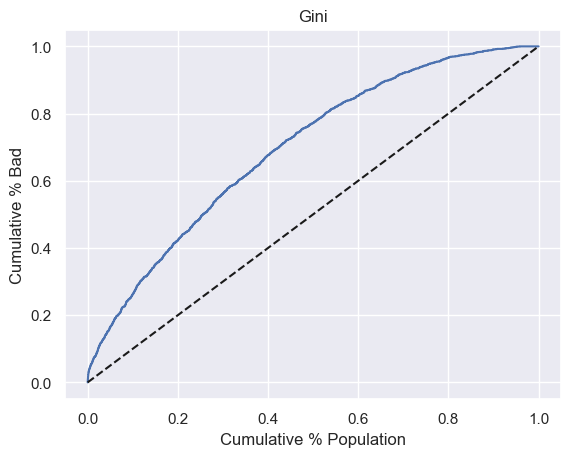

In [416]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

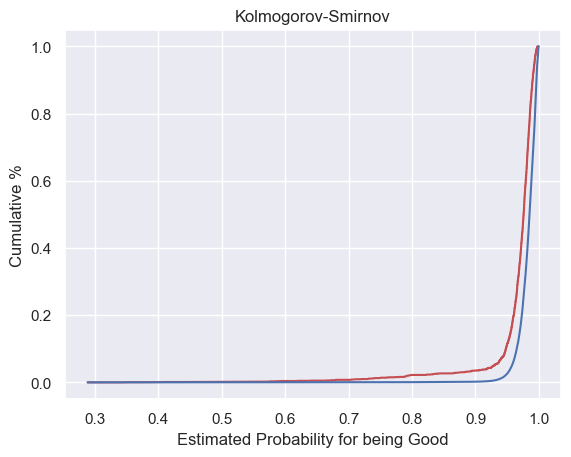

In [417]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [418]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.28589544179110754

### Applying PD Model

In [419]:
input_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
213591,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
165001,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [420]:
summary_table

,Feature name,Coefficients
0,Intercept,-0.823511
1,grade:A,1.626805
2,grade:B,0.958128
3,grade:C,0.745677
4,grade:D,0.453143
...,...,...
81,mths_since_last_record:81-86,0.678983
82,mths_since_last_record:>=86,0.785326
83,verification_status:Not Verified,0.088031
84,verification_status:Source Verified,-0.026083


#### Creating Scorecard

In [421]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mnth_since_issue_date:>111',
 'int_rate_factor:>20.281',
 'mnth_since_earliest_cr_line_date:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20k',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [423]:
df_ref_categories=pd.DataFrame(ref_categories,columns=['Feature name'])
df_ref_categories['Coefficients']=0

In [424]:
df_ref_categories

,Feature name,Coefficients
0,grade:G,0
1,home_ownership:RENT_OTHER_NONE_ANY,0
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0
3,verification_status:Verified,0
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0
5,initial_list_status:f,0
6,term:60,0
7,emp_length:0,0
8,mnth_since_issue_date:>111,0
9,int_rate_factor:>20.281,0


In [425]:
df_scorecard=pd.concat([summary_table, df_ref_categories])
df_scorecard=df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients
0,0,Intercept,-0.823511
1,1,grade:A,1.626805
2,2,grade:B,0.958128
3,3,grade:C,0.745677
4,4,grade:D,0.453143
...,...,...,...
98,12,acc_now_delinq:0,0.000000
99,13,annual_inc:<20k,0.000000
100,14,dti:>35,0.000000
101,15,mths_since_last_delinq:0-3,0.000000


In [426]:
df_scorecard['Original Feature name']=df_scorecard['Feature name'].str.split(':').str[0]

In [427]:
df_scorecard

,index,Feature name,Coefficients,Original Feature name
0,0,Intercept,-0.823511,Intercept
1,1,grade:A,1.626805,grade
2,2,grade:B,0.958128,grade
3,3,grade:C,0.745677,grade
4,4,grade:D,0.453143,grade
...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,acc_now_delinq
99,13,annual_inc:<20k,0.000000,annual_inc
100,14,dti:>35,0.000000,dti
101,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq


In [428]:
min_score=300
max_score=850

In [429]:
df_scorecard.groupby('Original Feature name')['Coefficients'].min()

Original Feature name
Intercept                          -0.823511
acc_now_delinq                      0.000000
addr_state                         -0.044680
annual_inc                         -0.286722
dti                                -0.115478
emp_length                         -0.005796
grade                              -0.103439
home_ownership                      0.000000
initial_list_status                -0.001417
inq_last_6mths                      0.000000
int_rate_factor                    -0.300974
mnth_since_earliest_cr_line_date   -0.011621
mnth_since_issue_date               0.000000
mths_since_last_delinq              0.000000
mths_since_last_record              0.000000
purpose                             0.000000
term                                0.000000
verification_status                -0.026083
Name: Coefficients, dtype: float64

In [430]:
min_sum_coef=df_scorecard.groupby('Original Feature name')['Coefficients'].min().sum()
min_sum_coef

-1.7197204464732474

In [431]:
df_scorecard.groupby('Original Feature name')['Coefficients'].max()

Original Feature name
Intercept                          -0.823511
acc_now_delinq                      0.681533
addr_state                          0.392588
annual_inc                          0.102721
dti                                 0.238139
emp_length                          0.000000
grade                               1.626805
home_ownership                      0.166801
initial_list_status                 0.000000
inq_last_6mths                      1.923152
int_rate_factor                     0.000000
mnth_since_earliest_cr_line_date    0.199421
mnth_since_issue_date               2.504639
mths_since_last_delinq              0.362389
mths_since_last_record              1.171425
purpose                             0.113056
term                                0.086092
verification_status                 0.088031
Name: Coefficients, dtype: float64

In [432]:
max_sum_coef=df_scorecard.groupby('Original Feature name')['Coefficients'].max().sum()
max_sum_coef

8.83328168521535

In [433]:
df_scorecard['Score-Calculation']=df_scorecard['Coefficients']*(max_score-min_score)/(max_sum_coef-min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,Original Feature name,Score-Calculation
0,0,Intercept,-0.823511,Intercept,-42.919617
1,1,grade:A,1.626805,grade,84.785606
2,2,grade:B,0.958128,grade,49.935569
3,3,grade:C,0.745677,grade,38.863115
4,4,grade:D,0.453143,grade,23.616860
...,...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000
99,13,annual_inc:<20k,0.000000,annual_inc,0.000000
100,14,dti:>35,0.000000,dti,0.000000
101,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000


In [434]:
df_scorecard['Score-Calculation'][0]=((df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef))*(max_score-min_score)+min_score
df_scorecard

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3512078959.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score-Calculation'][0]=((df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef))*(max_s

,index,Feature name,Coefficients,Original Feature name,Score-Calculation
0,0,Intercept,-0.823511,Intercept,346.708551
1,1,grade:A,1.626805,grade,84.785606
2,2,grade:B,0.958128,grade,49.935569
3,3,grade:C,0.745677,grade,38.863115
4,4,grade:D,0.453143,grade,23.616860
...,...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000
99,13,annual_inc:<20k,0.000000,annual_inc,0.000000
100,14,dti:>35,0.000000,dti,0.000000
101,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000


In [435]:
df_scorecard['Score-preliminary']=df_scorecard['Score-Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original Feature name,Score-Calculation,Score-preliminary
0,0,Intercept,-0.823511,Intercept,346.708551,347.0
1,1,grade:A,1.626805,grade,84.785606,85.0
2,2,grade:B,0.958128,grade,49.935569,50.0
3,3,grade:C,0.745677,grade,38.863115,39.0
4,4,grade:D,0.453143,grade,23.616860,24.0
...,...,...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000,0.0
99,13,annual_inc:<20k,0.000000,annual_inc,0.000000,0.0
100,14,dti:>35,0.000000,dti,0.000000,0.0
101,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000,0.0


In [441]:
min_sum_score_prel=df_scorecard.groupby('Original Feature name')['Score-preliminary'].min().sum()
min_sum_score_prel

301.0

In [442]:
max_sum_score_prel=df_scorecard.groupby('Original Feature name')['Score-preliminary'].max().sum()
max_sum_score_prel

850.0

In [438]:
df_scorecard['Difference']=df_scorecard['Score-preliminary']-df_scorecard['Score-Calculation']
df_scorecard

,index,Feature name,Coefficients,Original Feature name,Score-Calculation,Score-preliminary,Difference
0,0,Intercept,-0.823511,Intercept,346.708551,347.0,0.291449
1,1,grade:A,1.626805,grade,84.785606,85.0,0.214394
2,2,grade:B,0.958128,grade,49.935569,50.0,0.064431
3,3,grade:C,0.745677,grade,38.863115,39.0,0.136885
4,4,grade:D,0.453143,grade,23.616860,24.0,0.383140
...,...,...,...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000,0.0,0.000000
99,13,annual_inc:<20k,0.000000,annual_inc,0.000000,0.0,0.000000
100,14,dti:>35,0.000000,dti,0.000000,0.0,0.000000
101,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000,0.0,0.000000


In [439]:
df_scorecard['Score-final']=df_scorecard['Score-preliminary']
df_scorecard['Score-final'][4]=23

C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3613642931.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score-final'][4]=23
C:\Users\satyaki basak\AppData\Local\Temp\ipykernel_11068\3613642931.py:2: SettingWith

In [440]:
df_scorecard

,index,Feature name,Coefficients,Original Feature name,Score-Calculation,Score-preliminary,Difference,Score-final
0,0,Intercept,-0.823511,Intercept,346.708551,347.0,0.291449,347.0
1,1,grade:A,1.626805,grade,84.785606,85.0,0.214394,85.0
2,2,grade:B,0.958128,grade,49.935569,50.0,0.064431,50.0
3,3,grade:C,0.745677,grade,38.863115,39.0,0.136885,39.0
4,4,grade:D,0.453143,grade,23.616860,24.0,0.383140,23.0
...,...,...,...,...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000,0.0,0.000000,0.0
99,13,annual_inc:<20k,0.000000,annual_inc,0.000000,0.0,0.000000,0.0
100,14,dti:>35,0.000000,dti,0.000000,0.0,0.000000,0.0
101,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


### Creating Credit Score

In [443]:
input_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
213591,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
165001,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [444]:
df_scorecard

,index,Feature name,Coefficients,Original Feature name,Score-Calculation,Score-preliminary,Difference,Score-final
0,0,Intercept,-0.823511,Intercept,346.708551,347.0,0.291449,347.0
1,1,grade:A,1.626805,grade,84.785606,85.0,0.214394,85.0
2,2,grade:B,0.958128,grade,49.935569,50.0,0.064431,50.0
3,3,grade:C,0.745677,grade,38.863115,39.0,0.136885,39.0
4,4,grade:D,0.453143,grade,23.616860,24.0,0.383140,23.0
...,...,...,...,...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000,0.0,0.000000,0.0
99,13,annual_inc:<20k,0.000000,annual_inc,0.000000,0.0,0.000000,0.0
100,14,dti:>35,0.000000,dti,0.000000,0.0,0.000000,0.0
101,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


In [445]:
input_test_with_ref_cat_w_intercept=input_test_with_ref_cat

In [446]:
input_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)
input_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
213591,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
165001,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [447]:
input_test_with_ref_cat_w_intercept=input_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [448]:
scorecard_scores=df_scorecard['Score-final']

In [449]:
input_test_with_ref_cat_w_intercept.shape

(93257, 103)

In [452]:
scorecard_scores.shape

(103, 1)

In [451]:
scorecard_scores=scorecard_scores.values.reshape(103,1)

In [453]:
y_score=input_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [454]:
y_score.head()

,0
362514,598.0
288564,541.0
213591,690.0
263083,578.0
165001,699.0
